<a href="https://colab.research.google.com/github/neotee314/FaceRecognitionApp/blob/main/Object_erkennung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Inhaltverzeichnis**

1. **Projektbeschreibung**

2. **Projektworkflow**

3. **YOLOv8**
   - Pfade zum Datensatz
   - Installation von Roboflow
   - Laden des Datensatzes
   - Anzahl der Bilder vor der Augmentation mit Albumentations
   - Installation von Ultralytics
   - Einrichtung von YOLO mit Ultralytics
   - Data Augmentation mit Albumentations
   - Generierung eines augmentierten Datensatzes
   - Definition des Output-Ordners
   - Perform Augmentation für Validierungsdaten
   - Perform Augmentation für Testdaten
   - Anzahl der Bilder nach der Augmentation mit Albumentations
   - Plotten einiger Testdaten nach der Augmentation
   - Plotten einer zufälligen Stichprobe von Testdaten
   - Training des YOLOv8-Modells
   - Confusion Matrix für Trainingsdaten
   - Anzahl der Instanzen
   - Analyse des Trainings
   - Batch-Datei
   - Validierung des YOLOv8-Modells
   - Testen des YOLOv8-Modells
   - Konfusionsmatrix für Testdaten
   - Präzisions-Recall-Kurve und mAP für Testdaten
   - Ergebnisse der Modellvorhersagen auf Testbildern

4. **Das Model vom Hersteller**
   - Laden des Herstellermodells
   - Vorbereitung der Testdaten für das Herstellermodell
   - Sortieren der Testdaten nach Klassen
   - Datenvorbereitung
   - Laden der Testdaten
   - Anzahl der Testdaten
   - Testen des Hersteller-Modells
   - Einige Metriken
   - Genauigkeit der Klassifizierung
   - Konfusionsmatrix der Klassifizierung
   - Classification Report
   - Plotten der Vorhersagebilder

5. **Eigenes Model erstellen**
   - Hilfsmethode zum Laden der Daten
   - Daten laden
   - Model Training
   - Auswertung des Models
   - Classification Accuracy
   - Classification Loss
   - Bounding Box Loss
   - Model Test
   - Auswertung des Models
   - Prediction Classes
   - True Classes
   - Classification Accuracy
   - Bounding Box mAP
   - Bounding Box mAP berechnen
   - Bounding Box Precision Recall Curve
   - Confusion Matrix
   - Plotten der Bounding Boxes der Testergebnisse

6. **Schlussfolgerung**

#**Projektbeschreibung**

**Kurze Projektbeschreibung:**
Für einen kleinen Robotergreifarm (Niryo Ned2) gibt es eine fertige Anwendung in der der Roboter Schokoriegel greifen kann, die vor ihm auf einem Tisch liegen (github.com/NiryoRobotics/ned_applications/tree/master/examples/Vision_Pick_Artificial_Intelligence_Tensorflow). Leider funktioniert die Anwendung bei unterschiedlichen Lichtverhältnissen nicht so gut, d.h. Schokoriegel verschiedener Marken werden durcheinander gebracht. Das Ziel des Projekts ist es ein besseres Objektdetektionsmodell zu trainieren, als das bereits vom Hersteller mitgelieferte Klassifikationsmodell inkl. Bildverarbeitung zur Detektion der Schokoriegel. Trainingsdaten sind im github Projekt vorhanden, diese müssen allerdings für die Objektdetektion gelabelt werden. Das Labeling kann in diesem Fall durch die mitgelieferten Skripte allerdings größtenteils automatisch erfolgen. Bei Bedarf können auch selbst Trainingsdaten mit einer Kamera erstellt werden. Das Modell soll verbessert werden durch Techniken wie Data Augmentation und Domain Randomization. Beide Techniken vervielfältigen den Datensatz durch leichte Anpassungen der Bilder (Belichtung, Bildrauschen, Hintergrundfarbe, …). Das Tool roboflow.com könnte dabei hilfreich sein. Das Modell YOLOv8 (docs.ultralytics.com) könnte sich für die Objektdetektion anbieten. Alternativ währe auch die Objektsegmentierung anstatt der Detektion möglich, das den Vorteil hat, dass dann sofort die Lage des Schokoriegels ermittelt werden kann, die für die Ansteuerung des Greifers des Roboters benötigt wird.

---



**Lösung**
Zunächst habe ich die vorhandenen Trainingsdaten aus dem GitHub-Projekt des Roboters https://github.com/NiryoRobotics/ned_applications/tree/master/examples/Vision_Pick_Artificial_Intelligence_Tensorflow/data in Roboflow hochgeladen, um ein neues Projekt zu erstellen. Diese Daten wurden dann mittels Data Augmentation Techniken vervielfältigt, um die Vielfalt und Robustheit des Datensatzes zu erhöhen. Konkret wurden Anpassungen an Belichtung, Bildrauschen und Hintergrundfarbe vorgenommen. Anschließend wurde der erweiterte Datensatz in Trainings-, Test- und Validierungssets aufgeteilt. Ich habe letztendlich Data Augmentation mit albumentation gemacht.

Im nächsten Schritt wurde das YOLOv8-Modell, wie in den Dokumentationen auf docs.ultralytics.com beschrieben, verwendet, um dieses Modell mit den vorbereiteten Daten zu trainieren. Dieses Training wurde im beigefügten Notebook durchgeführt.
Nachdem ich das YOLOv8-Modell trainiert hatte, habe ich das Modell des Herstellers und anschließend mein eigenes Modell trainiert und auf den Testdaten getestet. Nach den Tests habe ich alle drei Modelle anhand ihrer Klassifizierungsgenauigkeit und ihrer Bounding-Box-mAP verglichen und bewertet. Basierend auf den Ergebnissen habe ich die Modelle nach ihrer Leistung eingestuft.

#**Projektworkflow**

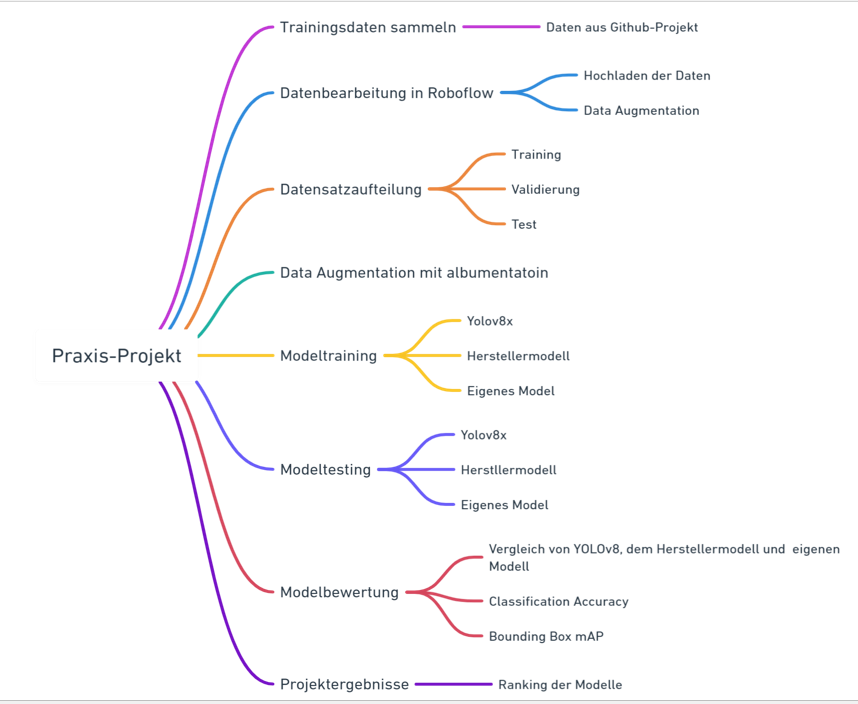

#**YOLOv8**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Pfade zum Daten**

In [ ]:
test_image_path = "/content/chocolate-bar-project-3/test/images"
test_labels_path = "/content/chocolate-bar-project-3/test/labels"

train_image_path = "/content/chocolate-bar-project-3/train/images"
train_labels_path = "/content/chocolate-bar-project-3/train/labels"

valid_image_path = "/content/chocolate-bar-project-3/valid/images"
valid_labels_path = "/content/chocolate-bar-project-3/valid/labels"


# **Installation von Roboflow**


Roboflow wird durch einen einfachen Installationsbefehl in der Python-Umgebung hinzugefügt. Es handelt sich um ein Tool zur Verarbeitung und Verwaltung von Bilddaten, das für maschinelles Sehen und Deep Learning Anwendungen entwickelt wurde. Es erleichtert das Hochladen, Organisieren und Bearbeiten von Trainingsdaten für die Objektdetektion.

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycl

#**Loading Dataset**

In diesem Teil des Notebooks erfolgt der Zugriff auf den Datensatz, den ich eigenhändig in Roboflow bearbeitet habe. Für mein Projekt "chocolate-bar-project 3" habe ich Daten, die ursprünglich vom Hersteller bereitgestellt wurden, in Roboflow importiert und dann manuell gelabelt. Diese manuelle Label-Arbeit war notwendig, um die verschiedenen Schokoriegelmarken korrekt für das Objektdetektionsmodell zu identifizieren.

Nach dem Labeling habe ich in Roboflow Data Augmentation-Techniken angewendet, um die Vielfalt der Daten zu erhöhen. Dies umfasst Anpassungen wie Veränderungen in der Belichtung und im Hintergrund, die dazu beitragen, die Leistung des Modells unter verschiedenen Umgebungsbedingungen zu verbessern. Roboflow hat dann diese bearbeiteten Daten in Sets für Training, Validierung und Tests aufgeteilt.

Schließlich habe ich den so vorbereiteten Datensatz im YOLOv8-Format heruntergeladen. Der Code, der hier im Notebook zu sehen ist, wurde von Roboflow bereitgestellt. Er ermöglicht es mir, direkt aus dem Notebook auf den sorgfältig vorbereiteten und angereicherten Datensatz zuzugreifen, um das Training des Objektdetektionsmodells effizient durchzuführen.

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="bdTuzksPK51ZnbM5HIa5")
project = rf.workspace("th-koeln-wzxph").project("chocolate-bar-project")
dataset = project.version(3).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to chocolate-bar-project-3 in yolov8:: 100%|██████████| 3612/3612 [00:00<00:00, 10757.83it/s]


#**Anzahl der Bilder vor der Augmentation mit albumentation**
Hier implementiere ich eine Funktion, um die Anzahl der Bilder vor der Augmentation berechnen. Später in diesem Notebook werde ich die Daten mit der Bibliothek Albumentations augmentieren, um die Anzahl der Testdaten zu vergrößern

In [ ]:
import os

def count_object_in_path(path, extension='.jpg'):
    files = os.listdir(path)
    image_files = [f for f in files if f.endswith(extension)]
    num_images = len(image_files)

    return num_images

In [ ]:
num_train_images = count_object_in_path(train_image_path)
num_valid_images = count_object_in_path(valid_image_path)

num_test_images = count_object_in_path(test_image_path)
num_test_labels = count_object_in_path(test_labels_path,'.txt')

print(f"Anzahl  train images: {num_train_images}")
print(f"Anzahl  valid images: {num_valid_images}")
print(f"Anzahl  test images: {num_test_images}")

Anzahl  train images: 1575
Anzahl  valid images: 150
Anzahl  test images: 75


# **Installation von Ultralytics**

hier installiere ich die Ultralytics-Bibliothek in meiner Python-Umgebung. Ultralytics bietet eine Reihe von Tools und Funktionen, die speziell für die Arbeit mit YOLO  Modellen im Bereich der Objektdetektion und Bilderkennung entwickelt wurden. Diese Bibliothek ist wesentlich für die Implementierung und das Training des YOLOv8-Modells in meinem Projekt.

In [ ]:
!pip install ultralytics

# **Einrichtung von YOLO mit Ultralytics**

In diesem Abschnitt des Notebooks wird die YOLO Technologie von Ultralytics eingesetzt. Durch das Importieren von YOLO aus der Ultralytics-Bibliothek und die Verwendung von IPython zur Anzeigebereinigung, bereite ich die Umgebung für die Überprüfung und Nutzung des YOLO-Modells vor. Der Befehl `!yolo checks` dient dazu, alle erforderlichen Voraussetzungen für die Nutzung von YOLO zu überprüfen und sicherzustellen, dass alles korrekt eingerichtet ist. Dies ist ein wichtiger Schritt, um mit der Objektdetektion und Bildanalyse im Projekt effektiv arbeiten zu können.

In [ ]:
from ultralytics import YOLO
from IPython import display
display.clear_output()
!yolo checks


Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


# **Data Augmentation with albumentation**
In diesem Teil werde ich die Bibliothek Albumentations verwenden, um die Helligkeit und den Kontrast der Bilder zu ändern und die Daten zu diversifizieren.



In [ ]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

Ich habe die bbox_params wie folgt definiert: Das Pascal VOC-Format wird für die Bounding-Box-Koordinaten verwendet, und die Klasseninformationen werden im Feld mit dem Namen `'field_id'` erwartet.

Für die Augmentation habe ich  eine Liste von Operationen erstellt, die auf die Bilder angewendet werden. Diese Operationen umfassen:

1. **RandomBrightnessContrast:** Zufällige Anpassungen von Helligkeit und Kontrast mit einer Wahrscheinlichkeit von 85%.
2. **GaussNoise:** Zufällige Hinzufügung von Gaussischem Rauschen mit einer Wahrscheinlichkeit von 25%.
3. **ToGray:** Zufällige Umwandlung des Bildes in Graustufen mit einer Wahrscheinlichkeit von 10%.
4. **RandomGamma:** Zufällige Anpassungen des Gamma-Werts mit einer Wahrscheinlichkeit von 20%.

Diese Operationen werden in einer `Compose`-Liste organisiert und mit den Bounding-Box-Parametern (`bbox_params`) versehen, um sicherzustellen, dass die Bounding-Box-Koordinaten korrekt angepasst werden, wenn Operationen durchgeführt werden, die die Bildgröße oder -position beeinflussen könnten.

In [ ]:
bbox_params = A.BboxParams(
  format='pascal_voc',
  label_fields= ['field_id']
)

aug = A.Compose([
    A.RandomBrightnessContrast(p=0.85),
    A.GaussNoise(p=0.25),
    A.ToGray(p=0.1),
    A.RandomGamma(p=0.2),
    A.HueSaturationValue(p=0.6),
], bbox_params=bbox_params)


Nun implementiere ich eine Funktion, die augmentation, ein Bild, ein Label und den Klassennamen als Eingabe erhält und ein augmentiertes Bild unter Verwendung der oben beschriebenen Augmentation zurückgibt

In [ ]:
# diese Funktion macht die Augmentation für ein Bild
#label = [0.65635, 0.29085, 0.1838, 0.46615] => voc = (112.89000000000003, 11.554999999999998, 149.65, 104.785)
#augmented_label = (112.8, 11.5, 149.65, 104.785)
def generate_augmented(augmentation, image, label, class_name):
   voc = yolo2voc(label, image.shape[1] , image.shape[0])
   augmented = augmentation(image = image, bboxes =[voc], field_id = [class_name])
   return augmented['image'],augmented['bboxes'][0]

#**Generierung eines augmentierten Datensatzes**"

Hier implementiere ich eine Funktion, die Pfade zu Bildern und Labels sowie eine Augmentation erhält und aus diesen Bildern neue Bilder unter Verwendung der Augmentation generiert.Diese neuen Bilder werden im  `output_path` gespeichert

In [ ]:
"""
Diese Funktion erhält Pfade zu einem Label, liest es ein und gibt nur die
Bounding Box aus diesem Label zurück. Die Labels haben zum Beispiel das
Format [1, 0.3, 0.4, 0.22, 0.33], wobei der erste Index die Klassenbezeichnung ist
(wir haben insgesamt 7 Klassen von 0 bis 6 durchnummeriert) und der Rest
die Bounding Box im YOLO-Format darstellt.
Die Funktion gibt also die restlichen 4 Zahlen zurück.
"""
def read_bbox_coordinates(bbox_path):
    with open(bbox_path, 'r') as file:
        line = file.readline().strip().split()
        bbox = list(map(float, line))
    bbox = [max(0, coord) for coord in bbox]
    return bbox

def generate_augmented_dataset(image_path, label_path, output_path, augmentation):

    image_output_path = os.path.join(output_path, 'images')
    label_output_path = os.path.join(output_path, 'labels')
    for path in [image_output_path, label_output_path]:
        if not os.path.exists(path):
            os.makedirs(path)
    image_files = [f for f in os.listdir(image_path) if f.endswith('.jpg')]

    for image_file in image_files:
        # Bildpfad erstellen
        image_filepath = os.path.join(image_path, image_file)
        # Labelpfad erstellen
        label_file = os.path.splitext(image_file)[0] + '.txt'
        label_filepath = os.path.join(label_path, label_file)
        if os.path.exists(label_filepath):
            # Bild und Label laden
            image = cv2.imread(image_filepath)
            label = read_bbox_coordinates(label_filepath)
            # Augmentation durchführen
            augmented_image, augmented_label = generate_augmented(augmentation, image, label[1:], label[0])
            augmented_label = list(augmented_label)
            augmented_label.insert(0, int(label[0]))
            augmented_label = tuple(augmented_label)
            augmented_label = voc2yolo(augmented_label, image.shape[1] , image.shape[0])
            augmented_label = list(augmented_label)
            augmented_label.insert(0, int(label[0]))
            augmented_label = tuple(augmented_label)
            formatted_label = "{} {}".format(int(augmented_label[0]), " ".join(map("{:.5f}".format, augmented_label[1:])))
            # Speichern des Bildes
            augmented_image_file = os.path.join(image_output_path, f"augmented_{image_file}")
            cv2.imwrite(augmented_image_file, augmented_image)
            # Speichern des  Labels
            augmented_label_file = os.path.join(label_output_path, f"augmented_{label_file}")
            with open(augmented_label_file, 'w') as f:
                f.write(formatted_label)

    print("Augmentierung abgeschlossen.")


Ich habe zwei Funktionen geschrieben, die bei der Umwandlung von Bounding-Box-Koordinaten zwischen zwei verschiedenen Formaten helfen: YOLO  und VOC (PASCAL VOC).


In [ ]:

def yolo2voc(yolo_bbox, img_width, img_height):
    x_center, y_center, bbox_width, bbox_height = yolo_bbox
    x_min = (x_center - bbox_width / 2) * img_width
    y_min = (y_center - bbox_height / 2) * img_height
    x_max = (x_center + bbox_width / 2) * img_width
    y_max = (y_center + bbox_height / 2) * img_height

    x_min = max(0, x_min)
    x_max = max(0, x_max)
    y_min = max(0, y_min)
    y_max = max(0, y_max)
    return x_min, y_min, x_max, y_max

def voc2yolo(voc_bbox, img_width, img_height):
    x_min, y_min, x_max, y_max = voc_bbox[1:]
    x_center = (x_min + x_max) / (2.0 * img_width)
    y_center = (y_min + y_max) / (2.0 * img_height)
    bbox_width = (x_max - x_min) / img_width
    bbox_height = (y_max - y_min) / img_height

    x_center = max(0, x_center)
    y_center = max(0, y_center)
    bbox_width = max(0, bbox_width)
    bbox_height = max(0, bbox_height)

    return x_center, y_center, bbox_width, bbox_height


#**Definition des Output Folder**

Hier werde ich den Ausgabeordner bestimmen, damit alle augmentierten Bilder dort gespeichert werden können

In [ ]:
test_output_path = "/content/chocolate-bar-project-3/test"
valid_output_path = "/content/chocolate-bar-project-3/valid"

## **Perform Augmentation for Validation data**

In [ ]:
generate_augmented_dataset(valid_image_path, valid_labels_path, valid_output_path, aug)

Augmentierung abgeschlossen.


## **Perform Augmentation for Test data**

In [ ]:
generate_augmented_dataset(test_image_path, test_labels_path, test_output_path, aug)


Augmentierung abgeschlossen.


# **Anzahl der Bildern nach der Augmentation mit albumentation**

In [ ]:
num_train_images = count_object_in_path(train_image_path)
num_valid_images = count_object_in_path(valid_image_path)

num_test_images = count_object_in_path(test_image_path)
num_test_labels = count_object_in_path(test_labels_path,'.txt')

print(f"Anzahl der Validationbilder {valid_image_path}: {num_valid_images}")
print(f"Anzahl der Testbilder: {num_test_images}")


Anzahl der Validationbilder /content/chocolate-bar-project-3/valid/images: 300
Anzahl der Testbilder: 150


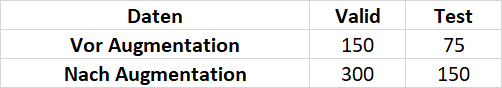

**Wie wir sehen, sind die Daten verdoppelt**

#**Plotten einiger Testdaten nach der Augmentation**

In diesem Abschnitt möchte ich einige Testbilder plotten. Der Ordner 'test/image' enthält sowohl alte als auch neue Bilder. Ich möchte zufällig einige davon plotten, um auch die Auswirkungen der Augmentation zu sehen. Um dies zu erreichen, habe ich einige Hilfsfunktionen implementiert, die unten zu sehen sind

In [ ]:
BOX_COLOR = (255, 0, 0)
"""
Diese Funktion erhält ein Bild in numpy format und eine Bounding
Box im YOLO-Format und gibt das zurück
"""
def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=2):
    x_center, y_center, width_bbox, height_bbox = bbox
    img_width, img_height = img.shape[1], img.shape[0]
    x_min = int((x_center - width_bbox / 2) * img_width)
    y_min = int((y_center - height_bbox / 2) * img_height)
    x_max = int((x_center + width_bbox / 2) * img_width)
    y_max = int((y_center + height_bbox / 2) * img_height)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    return img
"""
Diese Funktion erhält ein Bild im numpy-Format und die Bounding Box.
Mit Hilfe von visualize_box wird das Bild mit der Bounding Box gezeichnet,
und schließlich wird diese Funktion mit Matplotlib das Bild und die Bounding
Box plotten.
"""
def show_image(image, bbox):
  image = visualize_bbox(image.copy(), bbox)
  f = plt.figure(figsize=(3, 3))
  plt.imshow(
    cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    interpolation='nearest'
  )
  plt.axis('off')
  f.tight_layout()
  plt.show()

"""
Diese Funktion erhält Pfade zu einem Label und gibt die Klasse zurück.
Ein Label ist ein 1x5-Array, wobei der erste Index die Klasse ist.
Die Klassen sind
["Teasers", "bounty", "galaxy", "mars", "milky-way", "snickers", "twix"].
Die Funktion überprüft den ersten Index und gibt den entsprechenden Namen zurück.
"""
def get_class_name(label_path):
    class_names = ["Teasers", "bounty", "galaxy", "mars", "milky-way", "snickers", "twix"]

    with open(label_path, 'r') as file:
        line = file.readline().strip()
        class_index = int(line.split()[0])

        if 0 <= class_index < len(class_names):
            return class_names[class_index]
        else:
            return "Unbekannte Klasse"


#####Und letztendlich die Funktion `plot_img(image_path, label_path, numberOfPlotting)` erhält Pfade zu Bilddaten und Label-Daten und zusätzlich die Anzahl der Bilder, die geplottet werden sollen. Sie nutzt alle oben beschriebenen Hilfsfunktionen, um die Bilder zusammen mit den Bounding Boxes zu plotten

In [ ]:
import random
import os
import cv2

def plot_img(image_path, label_path, numberOfPlotting):

    image_files = [f for f in os.listdir(image_path) if f.endswith('.jpg')]


    selected_images = random.sample(image_files, numberOfPlotting)

    for image_file in selected_images:

        image_filepath = os.path.join(image_path, image_file)


        label_file = os.path.splitext(image_file)[0] + '.txt'
        label_filepath = os.path.join(label_path, label_file)
        class_name = get_class_name(label_filepath)


        if os.path.exists(label_filepath):
            image = cv2.imread(image_filepath)
            label = read_bbox_coordinates(label_filepath)
            show_image(image, label[1:])
            print(f"marke: {class_name}")


#**Plotten einer zufälligen Stichprobe von Testdaten**

Nun werde ich einige Testdaten, die ich zuvor generiert habe, mithilfe dieser Funktion plotten. Wie unten zu sehen ist, hat die Augmentation einen vielfältigen Testdatensatz mit unterschiedlichen Helligkeiten, Kontrasten und Farben produziert. Dies ermöglicht es, die Auswirkungen der Augmentation auf die Daten zu visualisieren und die Variationen im Datensatz zu überprüfen

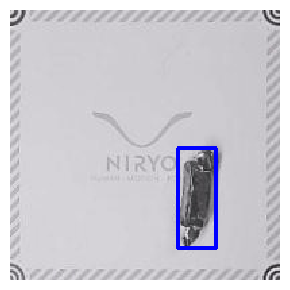

marke: mars


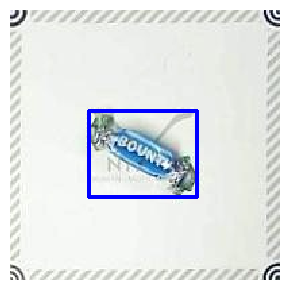

marke: bounty


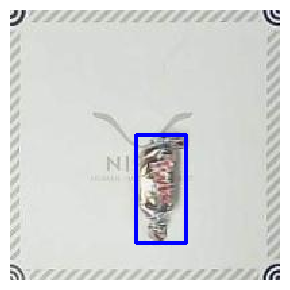

marke: twix


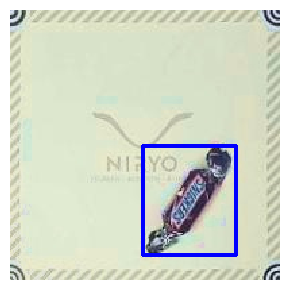

marke: snickers


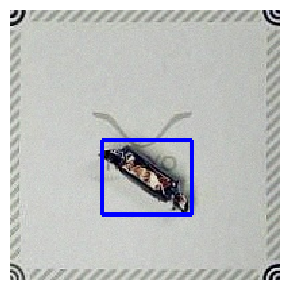

marke: mars


In [ ]:
image_folder_path = "/content/chocolate-bar-project-3/test/images"
label_folder_path = "/content/chocolate-bar-project-3/test/labels"
plot_img(image_folder_path, label_folder_path, numberOfPlotting=5)

#**Training des YOLOv8-Modells**
In diesem Abschnitt werde ich YOLOv8 auf den Trainingsdaten trainieren. Ich habe für das Training 3 Epochen ausgewählt, da dies eine beträchtliche Menge an GPU-Ressourcen benötigt und selbst mit einer Colab-GPU lange dauern kann. Der Parameter `plots=True` gibt an, dass die Ergebnisse des Trainings im Verzeichnis 'run/detect/' gespeichert werden. Dort werden einige Bilder zur Leistungsüberprüfung des Modells und ähnliche Informationen abgelegt.

In [ ]:
from ultralytics import YOLO
import os

model = YOLO("yolov8x.pt")  # build a YOLOv8x model

model.info()
model.train(task = 'detect',data=os.path.join(dataset.location,"data.yaml"),
            epochs=3,
            plots=True)  # train the model

YOLOv8x summary: 365 layers, 68229648 parameters, 0 gradients, 258.5 GFLOPs
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/chocolate-bar-project-3/data.yaml, epochs=3, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False,

100%|██████████| 755k/755k [00:00<00:00, 105MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 301MB/s]


AMP: checks passed ✅


train: Scanning /content/chocolate-bar-project-3/train/labels... 1575 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1575/1575 [00:00<00:00, 1970.94it/s]


train: New cache created: /content/chocolate-bar-project-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/chocolate-bar-project-3/valid/labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 998.52it/s] 


val: New cache created: /content/chocolate-bar-project-3/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      13.4G      1.125      2.348      1.449         13        640: 100%|██████████| 99/99 [02:06<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.06s/it]

                   all        300        300      0.635      0.549      0.616      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      13.9G      1.143       1.39      1.514          8        640: 100%|██████████| 99/99 [02:05<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.02it/s]

                   all        300        300      0.455      0.436      0.393      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      13.9G      1.025      1.067      1.422          9        640: 100%|██████████| 99/99 [02:04<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.04it/s]

                   all        300        300      0.922      0.906      0.932      0.769



3 epochs completed in 0.121 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 136.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68130309 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.26s/it]


                   all        300        300      0.922      0.906      0.932      0.769
               Teasers        300         48      0.985      0.833      0.893       0.75
                bounty        300         32      0.809      0.938      0.937       0.81
                galaxy        300         50      0.747       0.92      0.829      0.712
                  mars        300         22          1      0.918      0.979      0.771
             milky-way        300         48      0.937      0.924       0.96      0.786
               snikers        300         50          1      0.926      0.991      0.776
                  twix        300         50      0.978      0.881      0.936      0.776
Speed: 0.5ms preprocess, 27.3ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fcf9890b7f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

###**Das Modell besteht aus 365 Schichten und enthält insgesamt 68159349 Parameter**

#**Confustion Matrix für Trainingsata**

Nun werfen wir einen Blick auf die Konfusionsmatrix, um zu sehen, wie gut das Modell auf den Trainingsdaten abschneidet

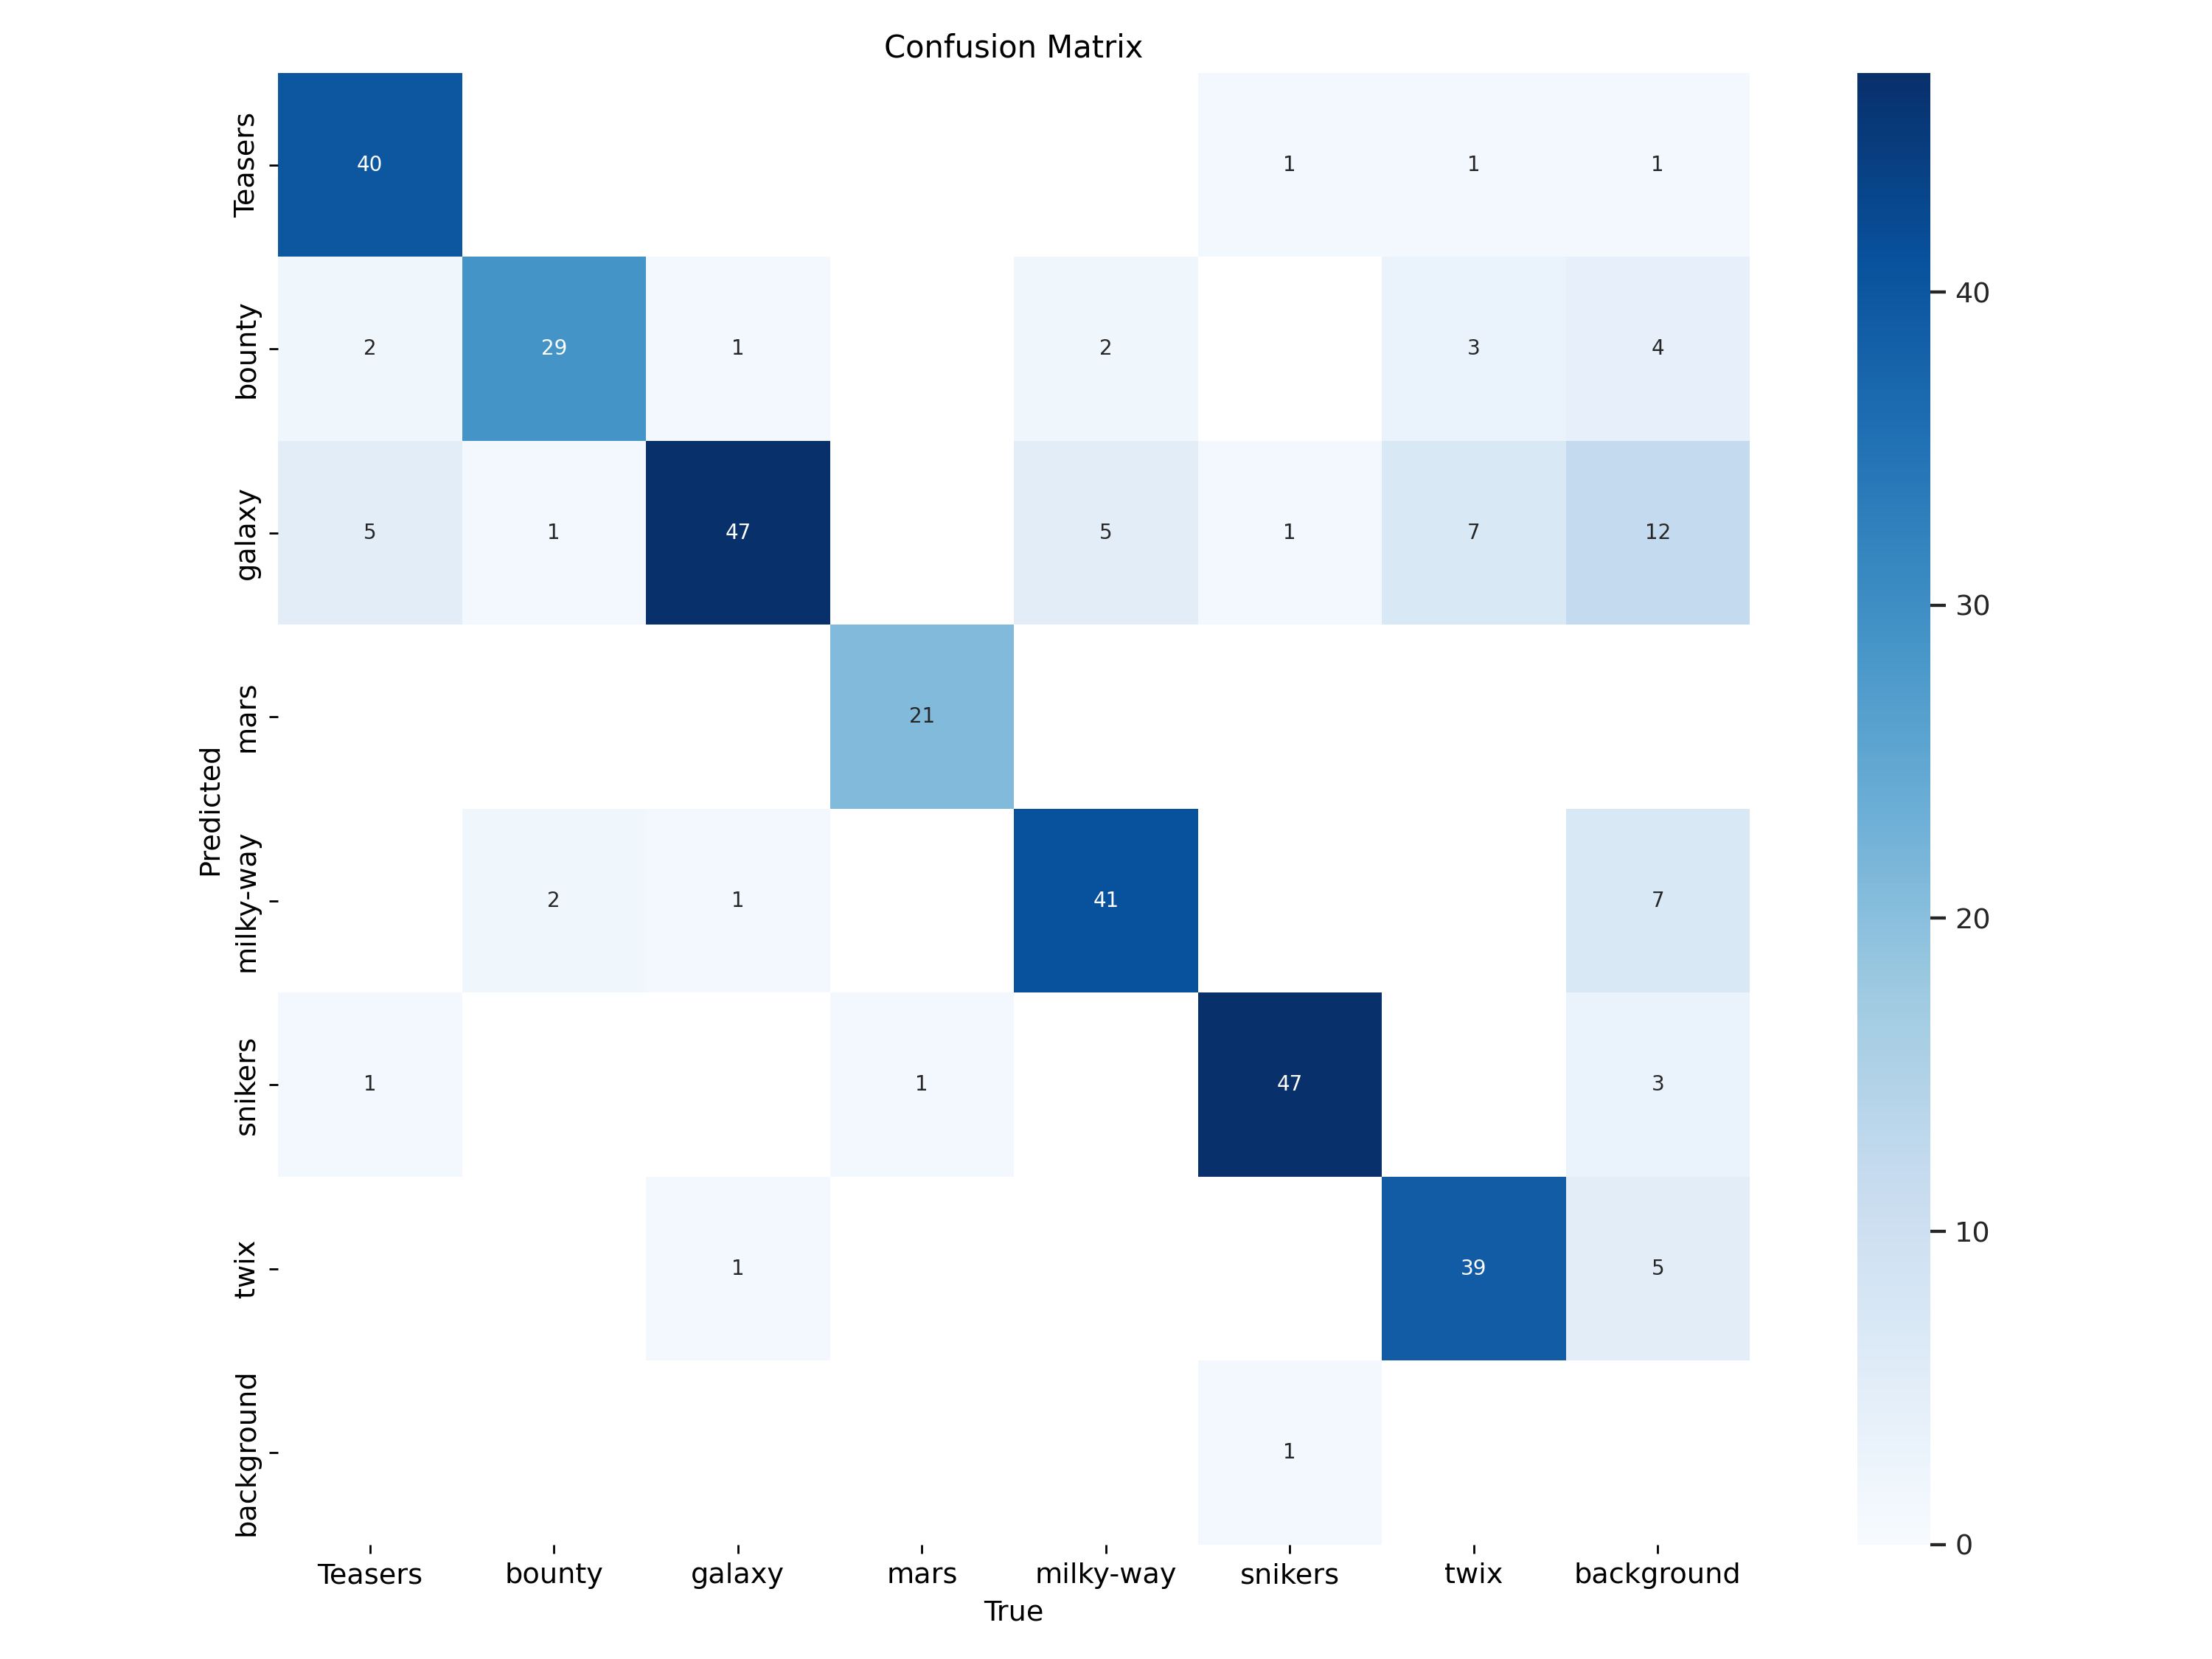

In [ ]:
from IPython.display import Image
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

## Interpretation der Konfusionsmatrix

 Das Modell zeigt eine starke Leistung bei der korrekten Klassifizierung von "Teasers", "Galaxy", "Snickers" und "milky-way". Dies deutet darauf hin, dass das Modell sehr effektiv darin trainiert wurde, diese spezifischen Marken zu identifizieren.


#**Anzahl der Instanzen**

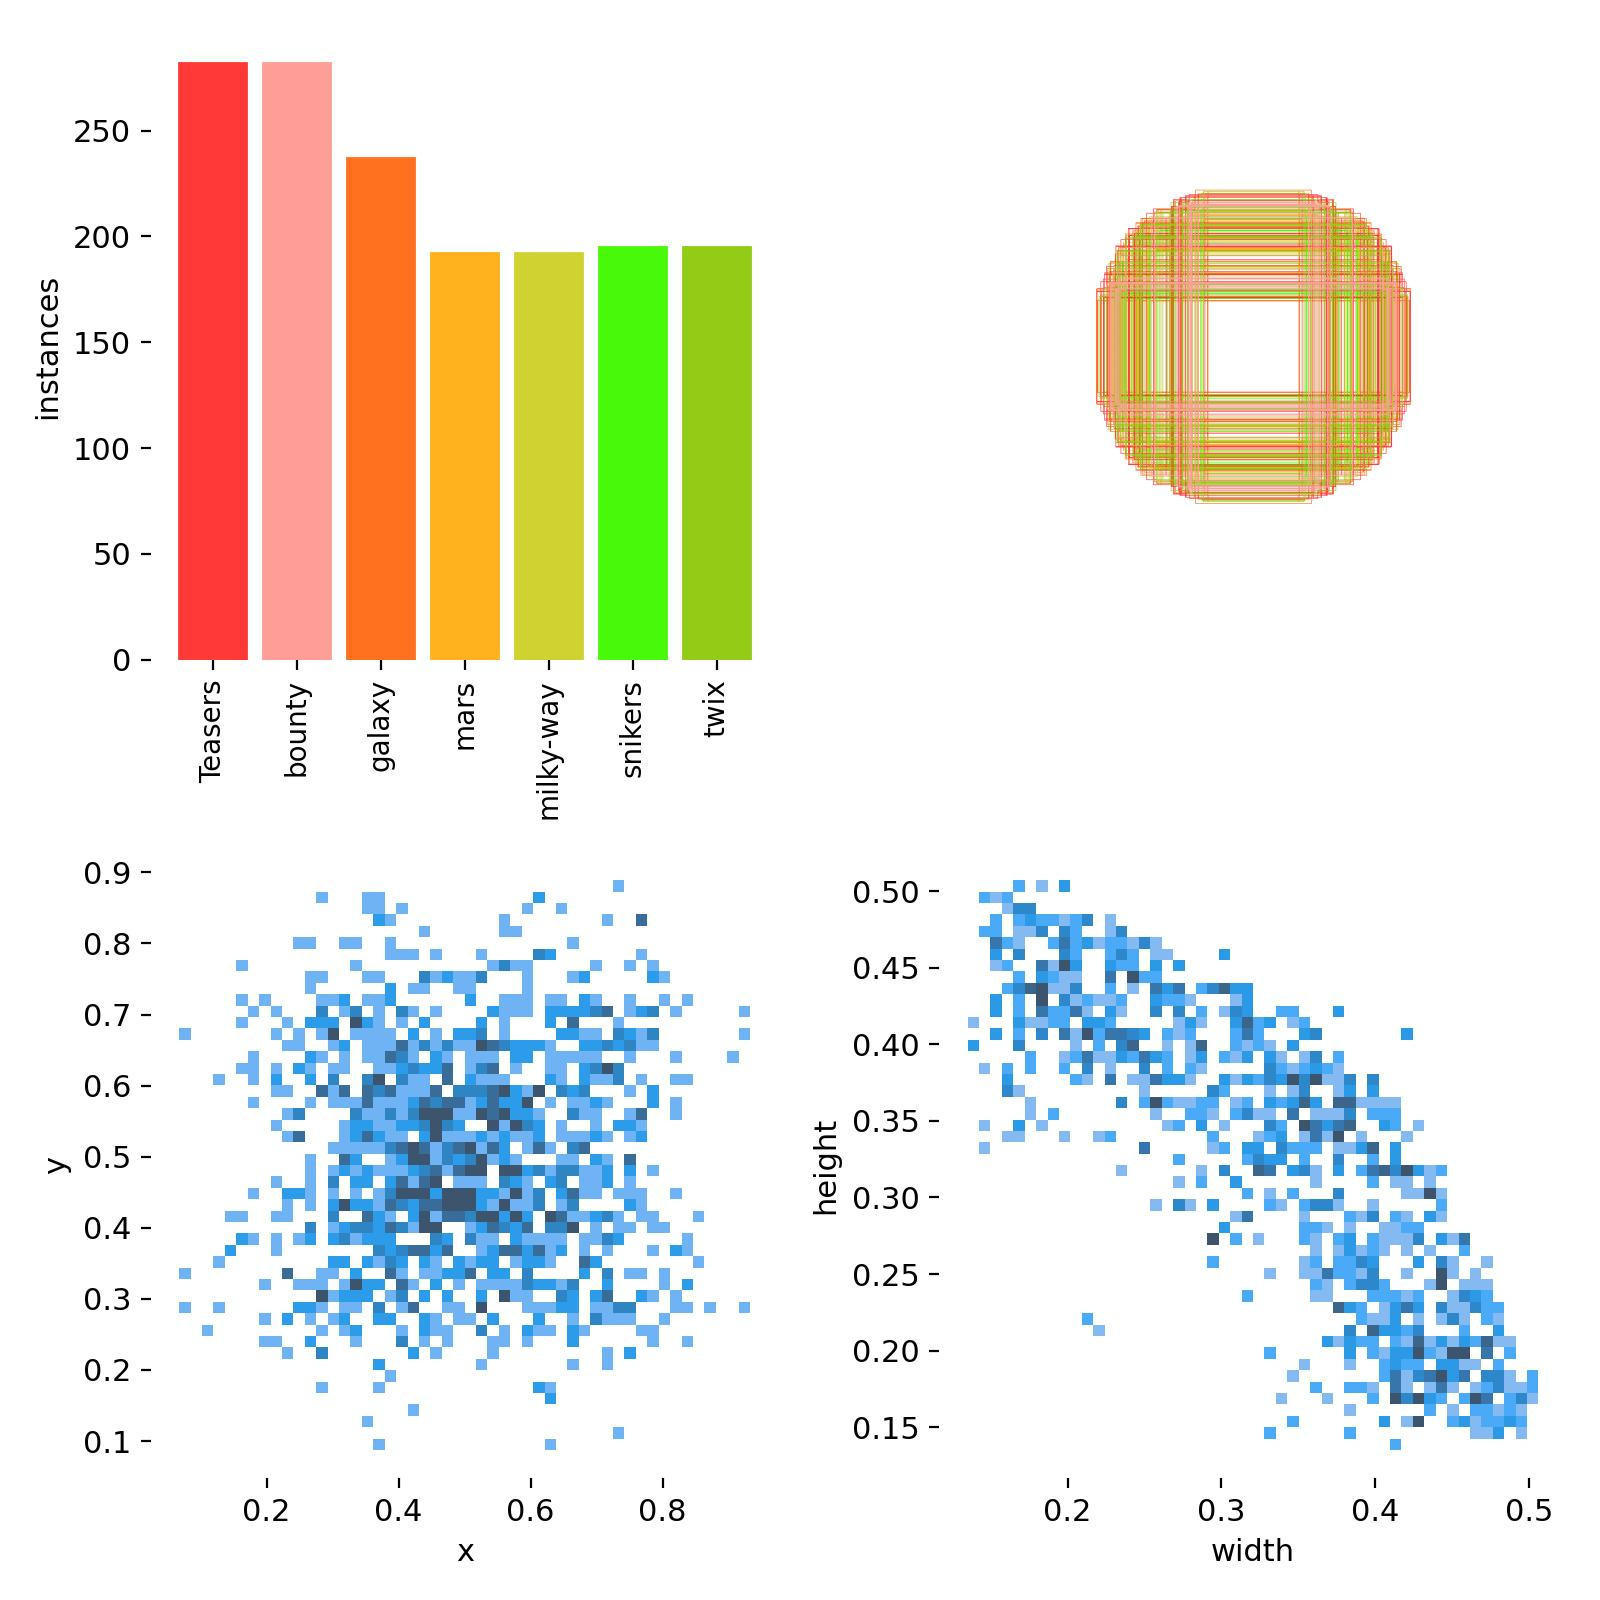

In [ ]:
from IPython.display import Image
Image(filename=f'/content/runs/detect/train2/labels.jpg', width=600)

### Interpretation von Labels


 **Balkendiagramm (oben links):** Dieses Diagramm zeigt die Anzahl der Instanzen für jede Schokoriegelmarke im Datensatz. "Teasers" scheint die häufigste Klasse zu sein, gefolgt von "Bounty" und "Galaxy", während "Twix" die geringste Anzahl an Instanzen aufweist. Diese Information ist nützlich, um zu beurteilen, ob das Datenset ausgeglichen ist oder ob es Klassen gibt, die möglicherweise unterrepräsentiert sind, was das Training eines Objektdetektionsmodells beeinflussen könnte.

# **Analyse der Training**



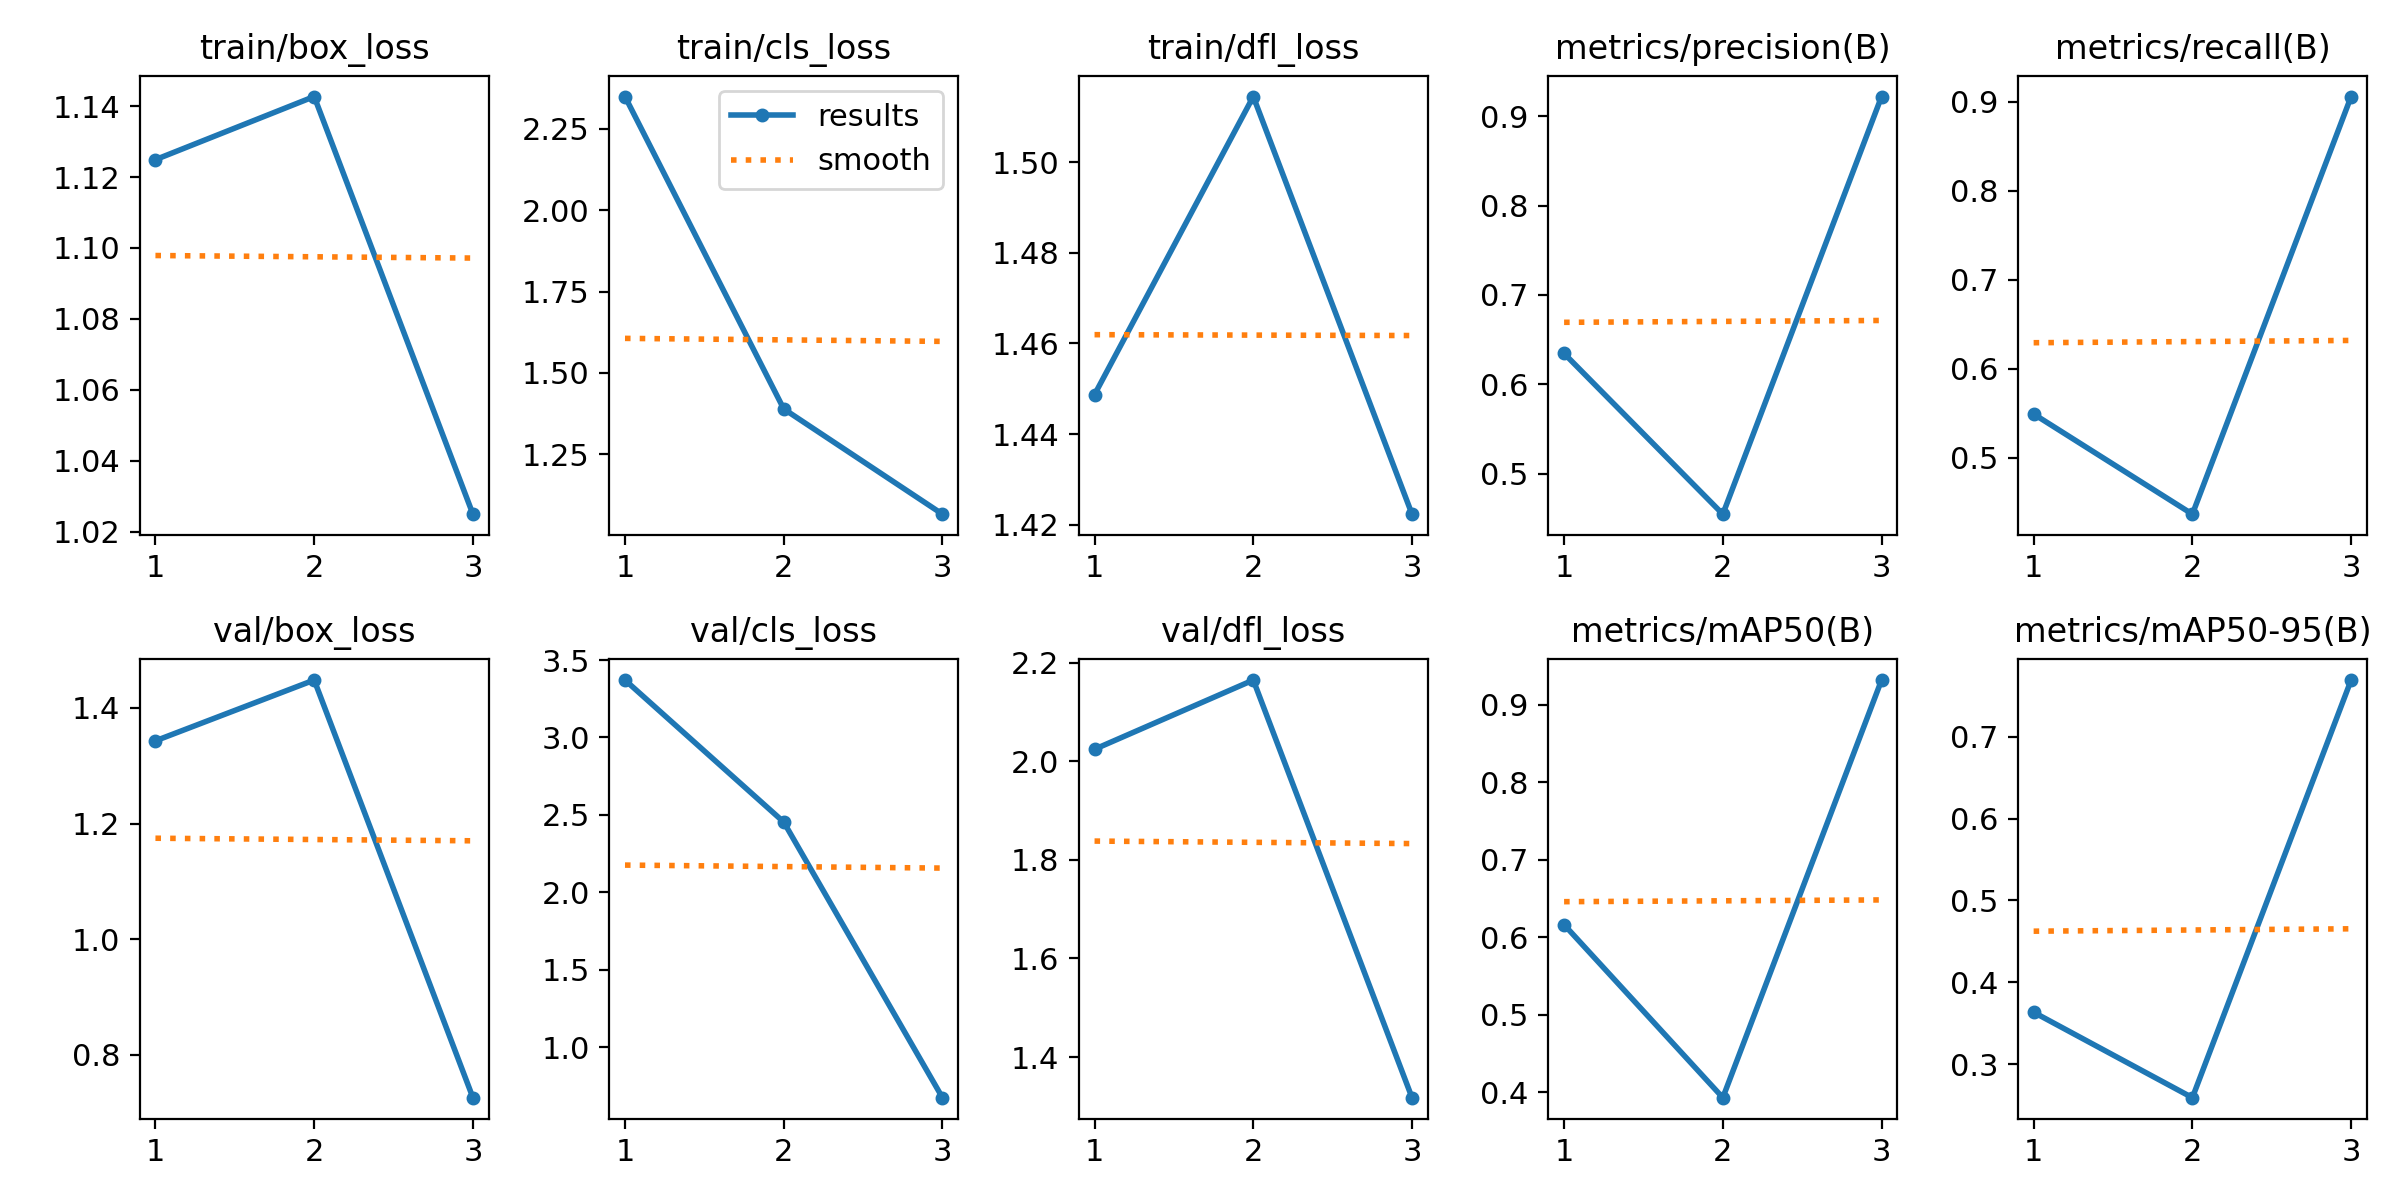

In [ ]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

## Interpretation

Das Bild zeigt Metriken aus dem Trainingsverlauf.

- **loss**: Dies repräsentiert den Gesamtverlust des Modells während des Trainings und der Validierung. Ein abnehmender Trend deutet darauf hin, dass das Modell besser wird und weniger Fehler bei der Vorhersage von Begrenzungsboxen und Klassifizierungen macht.

- **metrics/precision(B) und metrics/recall(B)**: Diese Metriken zeigen die Präzision und den Recall für Klasse B während des Trainings. Beide Metriken nehmen zu, was darauf hindeutet, dass das Modell präziser wird (weniger falsch positive Ergebnisse) und einen besseren Recall hat (weniger falsch negative Ergebnisse) für diese Klasse.

- **metrics/mAP50(B) und metrics/mAP50-95(B)**: Diese Metriken zeigen die mittlere durchschnittliche Präzision bei verschiedenen Schwellenwerten für die Überlappung der Begrenzungsboxen für Klasse B. Das Wachstum dieser Metriken deutet auf eine Verbesserung der Genauigkeit des Modells bei der Objekterkennung hin.

# **Batch-Datei**

Nun werfe ich einen Blick auf die Batch-Datei, die während des Trainings an das Modell übergeben wurde

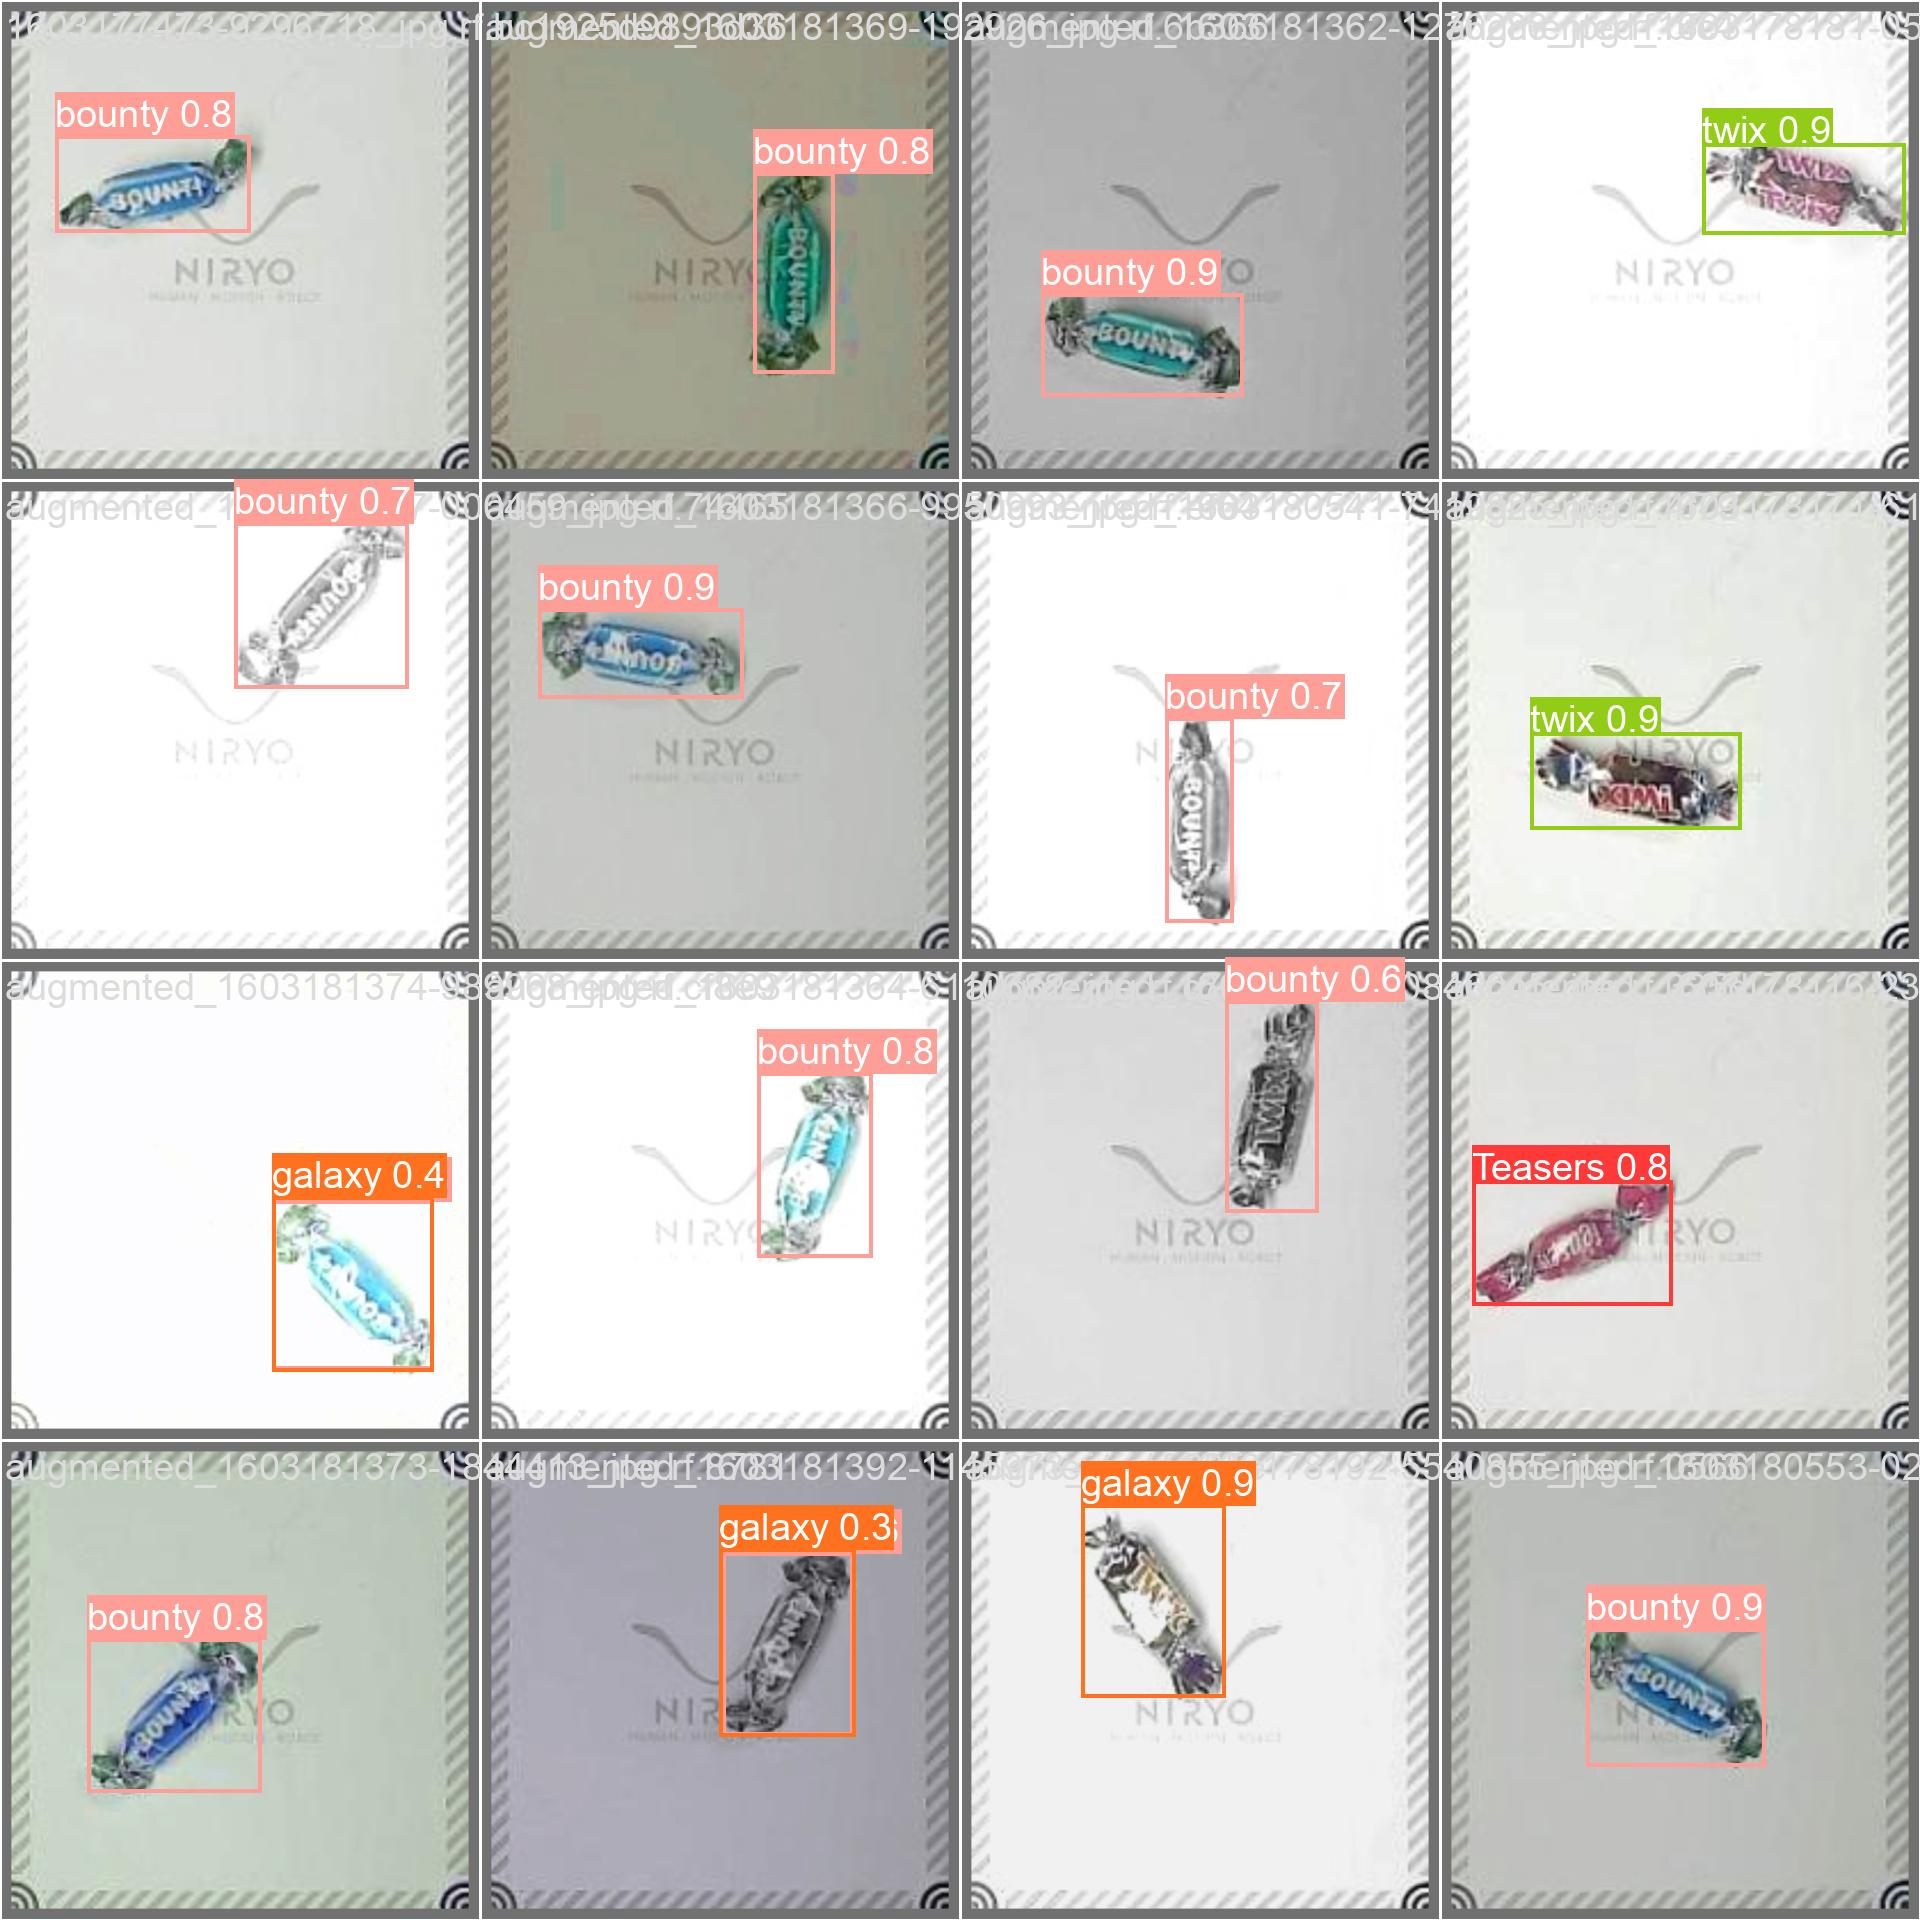

In [ ]:
Image(filename=f'/content/runs/detect/train2/val_batch0_pred.jpg', width=600)

Die Bilder zeigen verschiedene Erkennungssituationen, wobei einige Schokoriegel mit hoher Genauigkeit und hoher Konfidenz erkannt werden, wie mehrere "Snickers" mit einem Score von 1,0. Andere, wie ein "Milky-Way" mit einem Score von 0,3, weisen darauf hin, dass das Modell weniger sicher bei der Erkennung ist.

# **Validierung des YOLOv8-Modells**

Nun werde ich das Modell auf dem Validierungsdatensatz überprüfen

In [ ]:
model.val(task = 'detect',data=os.path.join(dataset.location,"data.yaml"),save = True)

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68130309 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /content/chocolate-bar-project-3/valid/labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:24<00:00,  1.30s/it]


                   all        300        300      0.922      0.906      0.932      0.769
               Teasers        300         48      0.985      0.833      0.893       0.75
                bounty        300         32      0.809      0.938      0.937       0.81
                galaxy        300         50      0.746       0.92      0.829      0.711
                  mars        300         22          1      0.919      0.978      0.771
             milky-way        300         48      0.937      0.924      0.961      0.787
               snikers        300         50          1      0.926      0.991      0.779
                  twix        300         50      0.978      0.881      0.936      0.779
Speed: 0.5ms preprocess, 67.7ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train22


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fcfa31764d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  


# **Testen des Yolov8-Modells**
In diesem Abschnitt werde ich YOLOv8 auf dem Testdatensatz überprüfen

In [ ]:
#model.predict(task = 'detect',source=f"{dataset.location}/test/images",
 #             save = True)

model.val(task = 'detect',source=f"{dataset.location}/test/images",save = True)

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/chocolate-bar-project-3/valid/labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:22<00:00,  1.18s/it]


                   all        300        300      0.922      0.906      0.932      0.769
               Teasers        300         48      0.985      0.833      0.893       0.75
                bounty        300         32      0.809      0.938      0.937       0.81
                galaxy        300         50      0.746       0.92      0.829      0.711
                  mars        300         22          1      0.919      0.978      0.771
             milky-way        300         48      0.937      0.924      0.961      0.787
               snikers        300         50          1      0.926      0.991      0.779
                  twix        300         50      0.978      0.881      0.936      0.779
Speed: 0.4ms preprocess, 63.8ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train23


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fcfa366c130>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

# **Konfusionsmatrix für Testdaten**

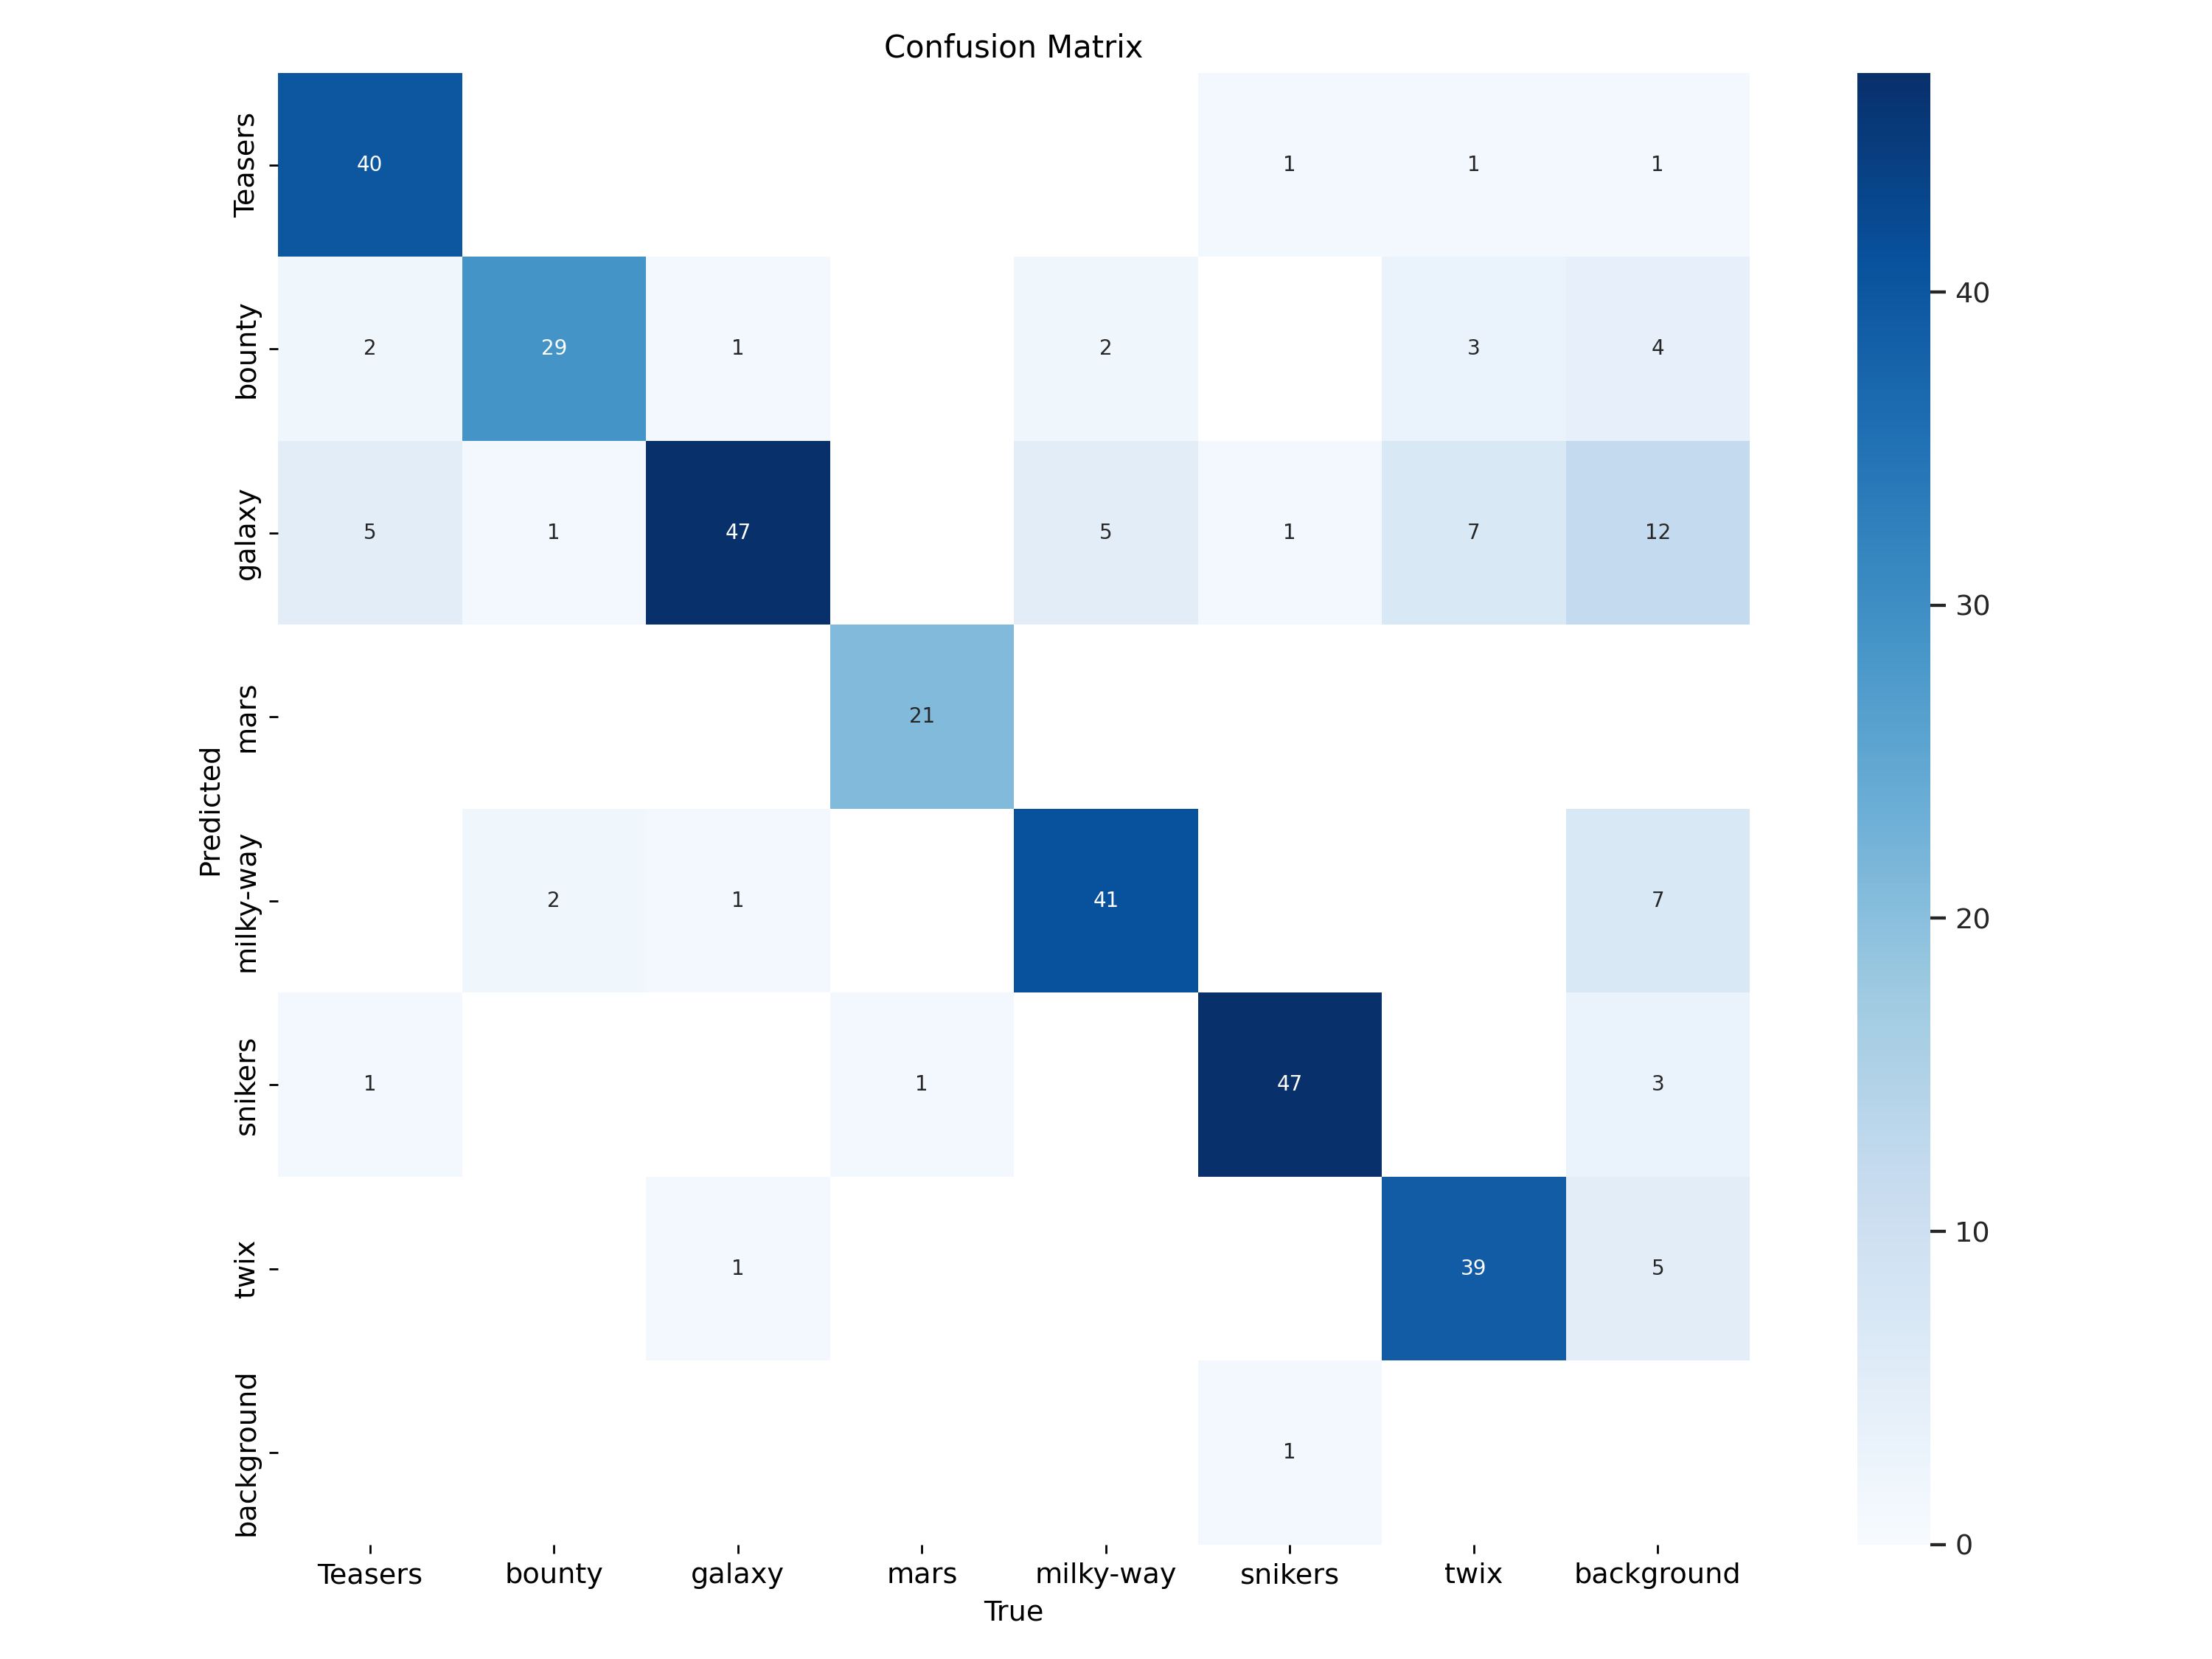

In [ ]:
from IPython.display import Image
Image(filename=f'/content/runs/detect/train23/confusion_matrix.png', width=600)

# **Präzisions-Recall-Kurve und mAP für Testdaten**

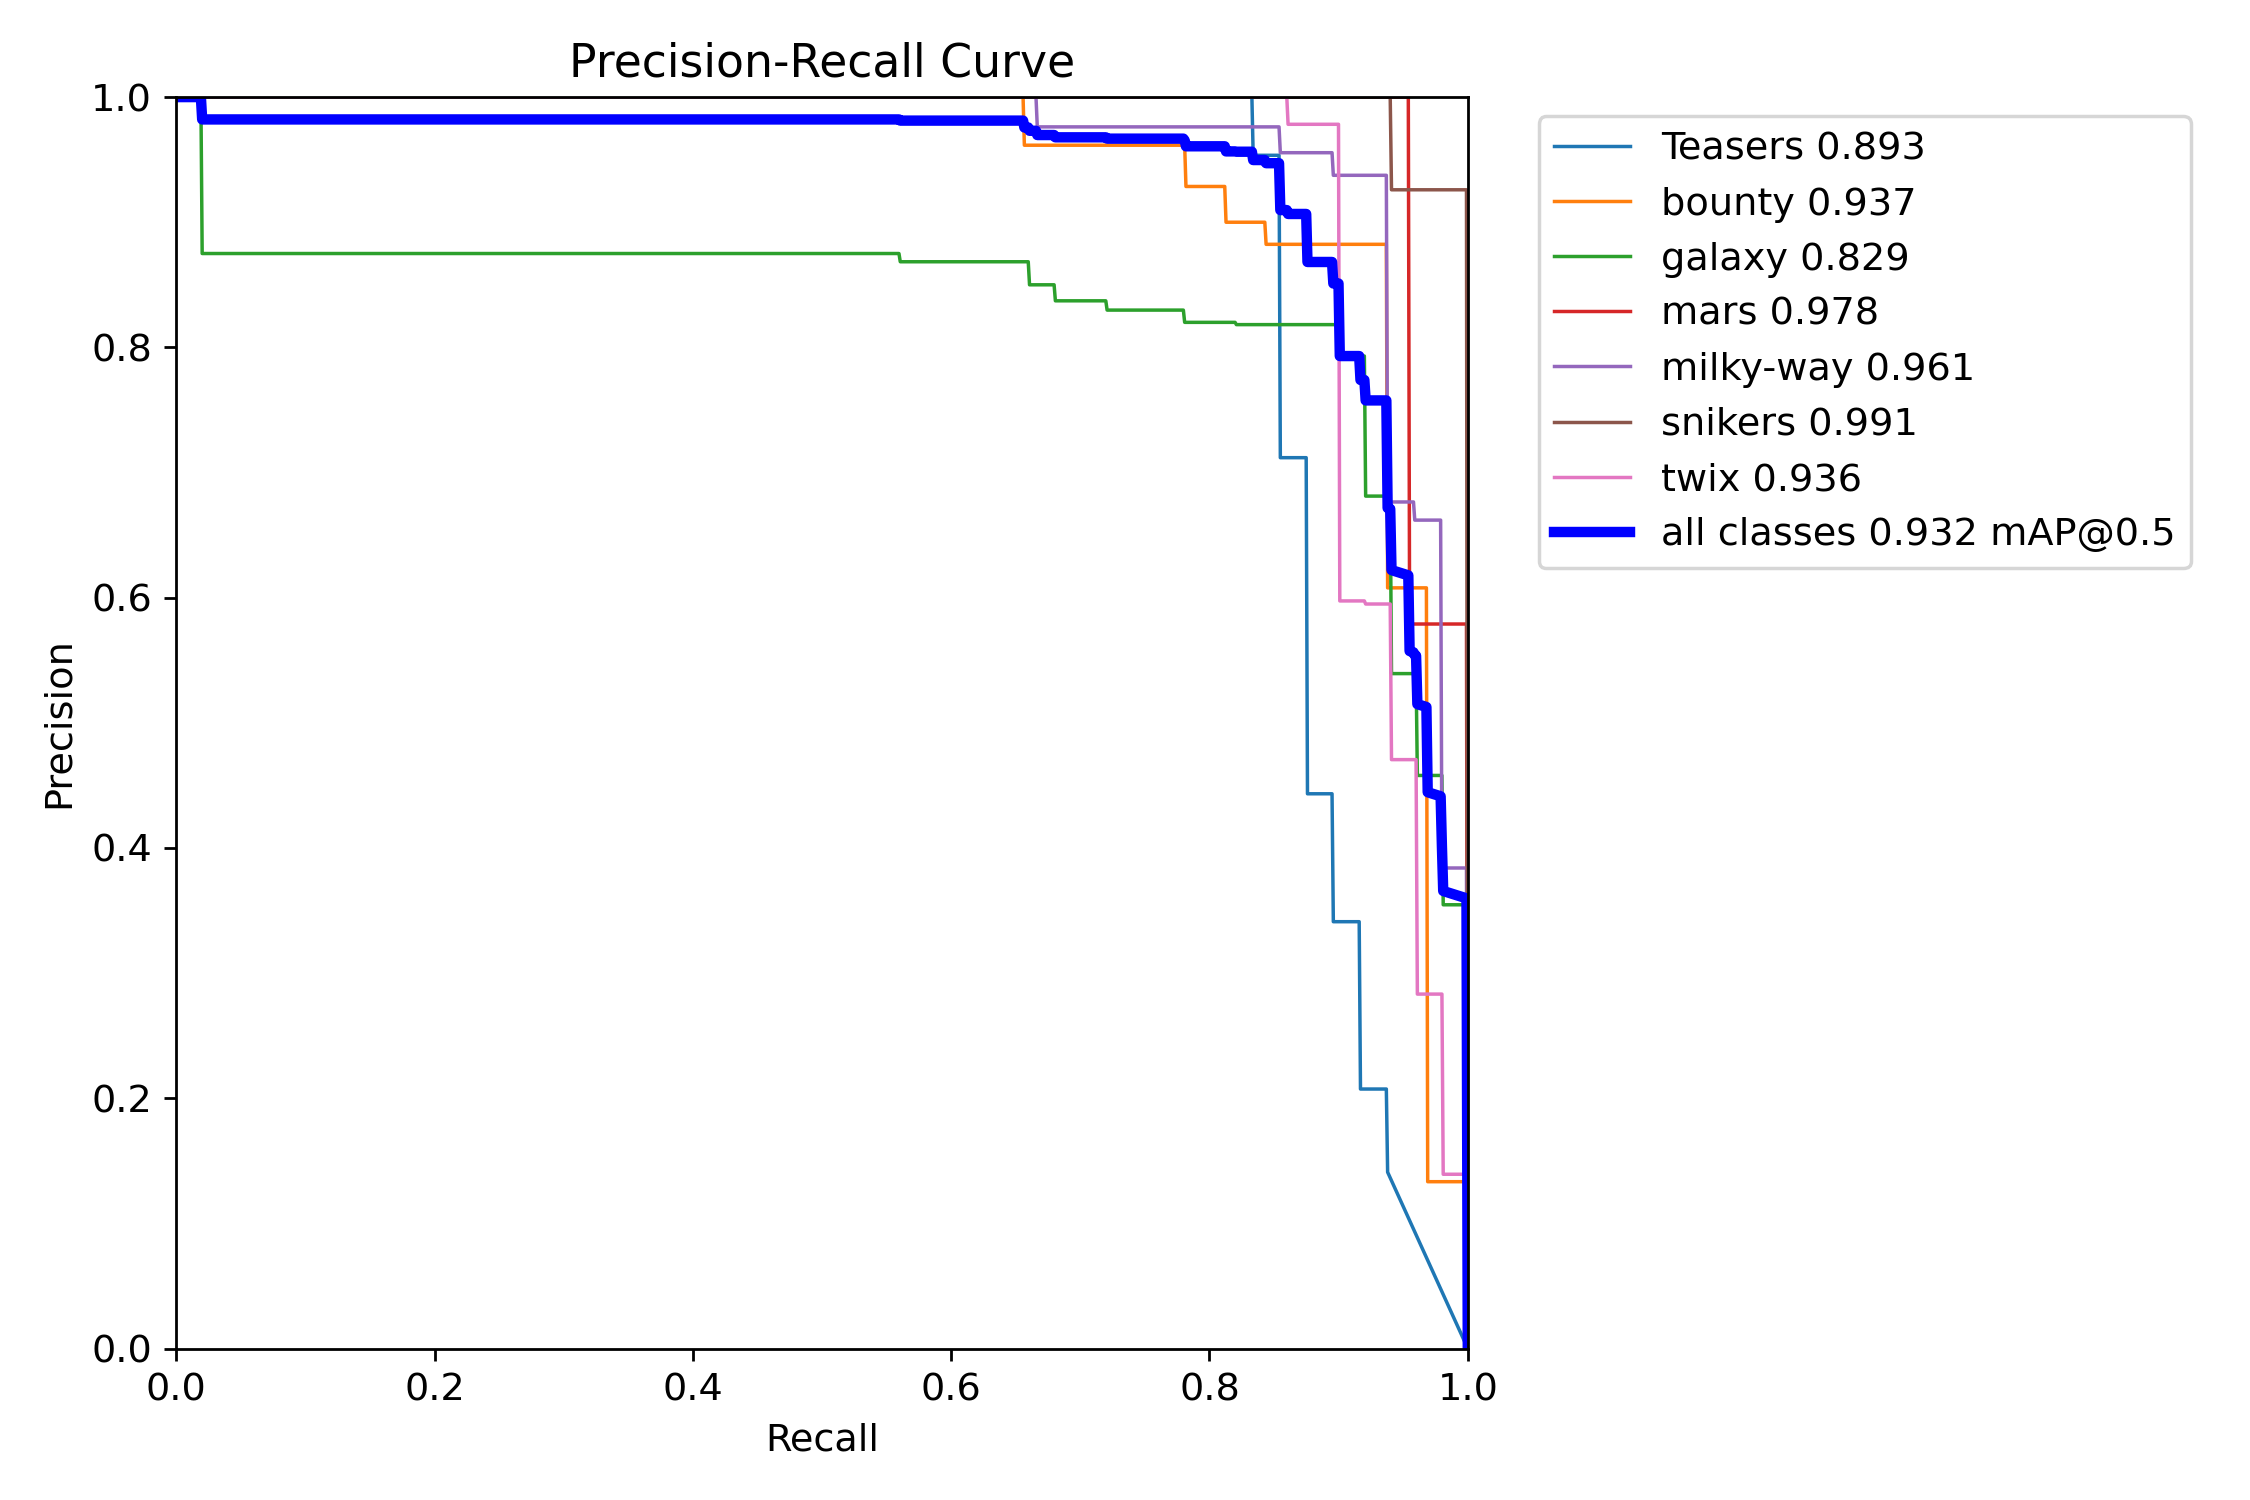

In [ ]:
from IPython.display import Image
Image(filename=f'/content/runs/detect/train23/PR_curve.png', width=800)

### Interpretation

- Die Präzision ist für alle Klassen sehr hoch (nahe 1.0), was darauf hinweist,

 dass das Modell eine sehr hohe Wahrscheinlichkeit hat, eine positive Vorhersage korrekt zu machen

- Der Recall ist für alle Klassen ebenfalls sehr hoch und erreicht Werte nahe 1.0, was bedeutet, dass das Modell fast alle positiven Fälle korrekt identifiziert hat.

- Die Kurven fallen zum rechten Rand hin leicht ab, was typisch ist, da es schwieriger wird, die Präzision aufrechtzuerhalten, wenn man versucht, den Recall zu maximieren

- Die Linie für "all classes" zeigt die durchschnittliche Präzision über alle Klassen hinweg und hat einen Wert von 0.932 bei einem mAP@0.5, was auf eine hervorragende Modellleistung hindeutet.

#**Ergebnisse der Modellvorhersagen auf Testbildern**
 In diesem Abschnitt werde ich die visuellen Ergebnisse des trainierten Modells auf Testbildern präsentieren. Die vorhergesagten Bounding Boxes sind auf den Bildern markiert.

In [ ]:
model.predict(task = 'detect',source=f"{dataset.location}/test/images",
             save = True)


image 1/150 /content/chocolate-bar-project-3/test/images/1603177435-2590907_jpg.rf.6d689c803f67480aa27e657199f83c35.jpg: 640x640 1 bounty, 80.2ms
image 2/150 /content/chocolate-bar-project-3/test/images/1603177470-772376_jpg.rf.a1f29eff80fe438a94cfce736cbf2609.jpg: 640x640 1 bounty, 63.0ms
image 3/150 /content/chocolate-bar-project-3/test/images/1603177472-4112854_jpg.rf.8dc48070c5a473d186c11a6bc00b61d3.jpg: 640x640 1 bounty, 63.7ms
image 4/150 /content/chocolate-bar-project-3/test/images/1603177590-0208824_jpg.rf.930f1458ecf7410f1b7fa2526ab3bb33.jpg: 640x640 1 galaxy, 62.2ms
image 5/150 /content/chocolate-bar-project-3/test/images/1603177667-0270965_jpg.rf.afcbe60d26f6ab69dc62c3ae4a6bae25.jpg: 640x640 1 bounty, 62.5ms
image 6/150 /content/chocolate-bar-project-3/test/images/1603177769-9036794_jpg.rf.5ceeea2ddd1f55ab04e55c0ff6af535b.jpg: 640x640 1 mars, 62.6ms
image 7/150 /content/chocolate-bar-project-3/test/images/1603177788-9081333_jpg.rf.591943b536c15e1e4da612d391519880.jpg: 640x6

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Teasers', 1: 'bounty', 2: 'galaxy', 3: 'mars', 4: 'milky-way', 5: 'snikers', 6: 'twix'}
 obb: None
 orig_img: array([[[199, 200, 198],
         [225, 226, 224],
         [218, 216, 215],
         ...,
         [ 98,  83,  80],
         [ 70,  58,  54],
         [ 90,  78,  74]],
 
        [[200, 201, 199],
         [219, 220, 218],
         [200, 198, 197],
         ...,
         [ 82,  70,  66],
         [ 66,  54,  50],
         [112, 100,  96]],
 
        [[241, 244, 242],
         [236, 237, 235],
         [179, 177, 176],
         ...,
         [115, 102, 100],
         [ 49,  36,  34],
         [ 53,  41,  39]],
 
        ...,
 
        [[122, 122, 122],
         [109, 109, 109],
         [158, 158, 158],
         ...,
         [223, 218, 217],
         [198, 193, 192],
         [189, 184, 183]],
 
        [[148, 148, 148],
     

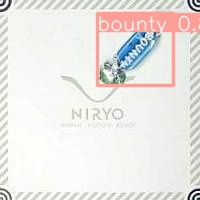

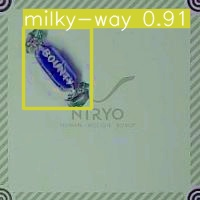

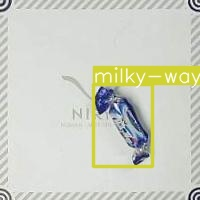

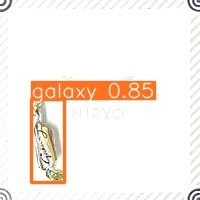

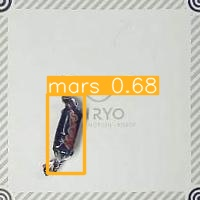

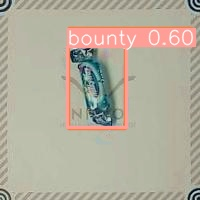

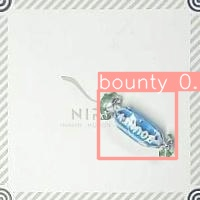

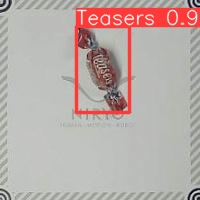

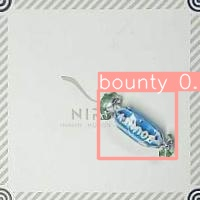

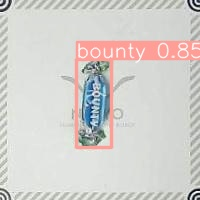

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/train24/*.jpg')[10:20]:
      display(Image(filename=image_path, width=200))
      print("\n")

Das Modell hat für schlecht beleuchtete Bilder sehr gute Ergebnisse erzielt. Die Klassennamen sind fast immer korrekt, und die Bounding Box ist ebenfalls sehr präzise.

# **Das Model vom Hersteller**

## **Laden des Herstellermodells**

Ich führe hier das Laden eines gespeicherten Keras-Modells aus einem bestimmten Pfad durch. Für das Training des Herstellermodells habe ich zuerst ein Colab-Notebook erstellt (https://colab.research.google.com/drive/1ZlTPP5fwGRNFhWr1evt2rtWJ4ELJmwmZ), in dem ich exakt den Code aus dem GitHub-Repository des Herstellers eingefügt, angepasst und das Modell trainiert habe. Anschließend habe ich das Modell unter '/content/drive/MyDrive/ColabNotebooks/praxisproject/Vision_Pick_Artificial_Intelligence_Tensorflow/model' gespeichert.

In diesem Notebook lade ich das Modell aus diesem Verzeichnis.

In [ ]:
import tensorflow as tf

saved_model_path = "/content/drive/MyDrive/Colab Notebooks/praxis project/Vision_Pick_Artificial_Intelligence_Tensorflow/model"
model_hersteller = tf.keras.models.load_model(saved_model_path)



# **Vorbereitung der Testdaten für das Herstellermodell**

Nachdem ich den Code des Herstellermodells genau eingearbeitet habe, habe ich bemerkt, dass einige Schritte erforderlich sind, um das Modell des Herstellers auf meine Testdaten zu trainieren. Zunächst muss ich darauf hinweisen, dass das Modell des Herstellers die Data Mask-Technik verwendet, um die Objekterkennung durchzuführen. Das bedeutet, dass es keine Bounding Boxes vorhersagt. Alles, was das Modell tut, ist die Vorhersage des Klassennamens. Das wiederum bedeutet, dass ein Label im kategorischen Format vorliegt und nur den Klassennamen ausgibt. Zum Beispiel muss das Label aus meinen Testdaten `[1, 0.3, 0.2, 0.44, 0.222]` in `[0, 1, 0, 0, 0, 0, 0]` umgewandelt werden.

Andererseits benötigt das Modell des Herstellers ein Verzeichnis, das alle Bilder nach Klassenordnern sortiert und Bilder in den jeweiligen Ordnern der Klassen enthält. Das bedeutet, dass ein Ordner mit dem Namen 'data' sieben Unterordner haben sollte. Jedoch sieht meine Verzeichnisstruktur anders aus.

Die Testbilder befinden sich unter '/content/chocolate-bar-project-3/test/images/' und die Labels unter '/content/chocolate-bar-project-3/test/labels/'. Allerdings kann dies nicht direkt für das Modell des Herstellers verwendet werden. Ich musste alle Bilder  in einem neuen Datenverzeichnis 'data/' speichern. Das ist, was ich in diesem Abschnitt durchführe.


In [ ]:
"""
Hier gebe ich die Pfade zu den Testdaten (Images und den Labels)an
"""

import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

# path to test data
images_dir = '/content/chocolate-bar-project-3/test/images/'
labels_dir = '/content/chocolate-bar-project-3/test/labels/'


class_names = ['Teasers', 'bounty', 'galaxy', 'mars', 'milky-way', 'snikers', 'twix']


#**Sortieren der Testdaten nach Klassen**

In diesem Abschnitt werde ich alle Testbilder nach Klassen sortieren und in einem neuen Pfad 'data/' nach Klassen speichern. Das bedeutet, dass jede Klasse einen Unterordner in 'data/' darstellt und alle Bilder dieser Klasse enthält

In [ ]:
import os
import cv2
import numpy as np

class_names = ['Teasers', 'bounty', 'galaxy', 'mars', 'milky-way', 'snikers', 'twix']

data_path = '/content/chocolate-bar-project-3/test/'

# Hier werde ich alle Bilder nach Klassen speichern
target_path = '/content/chocolate-bar-project-3/data/'

#Wenn es diesen Pfade nicht gibt, erstelle ich das erneut
if not os.path.exists(target_path):
    os.makedirs(target_path)

# Iterieren  durch alle Bilder und Labels
for file_name in os.listdir(os.path.join(data_path, 'images')):
    # Bild laden
    img_path = os.path.join(data_path, 'images', file_name)
    img = cv2.imread(img_path)

    # Label lesen
    label_path = os.path.join(data_path, 'labels', file_name.replace('.jpg', '.txt'))
    with open(label_path, 'r') as f:
        label = np.array([x for x in f.readline().split()])


    # Bestimme die Klasse anhand des Labels
    class_index = int(label[0])  # Überspringe den ersten Index, der die Klasse repräsentiert

    # Zielverzeichnis für die Klasse
    class_path = os.path.join(target_path, class_names[class_index])
    if not os.path.exists(class_path):
        os.makedirs(class_path)

    # Speichere das Bild im Zielverzeichnis der Klasse
    target_file_path = os.path.join(class_path, file_name)
    cv2.imwrite(target_file_path, img)

print("Bilder wurden nach Klassen sortiert und gespeichert.")


Bilder wurden nach Klassen sortiert und gespeichert.


#**Datenvorbereitung**

Bis jetzt habe ich ein Verzeichnis namens 'data' erstellt, in dem jedes Bild in seinem Klassenverzeichnis gespeichert ist. Ich bin jedoch noch nicht fertig. Nun muss ich diese Daten dem Modell zur Verfügung stellen. Hierfür verwende ich eine Methode namens `load_dataset(data_path)` aus dem Code des Herstellers. Diese Methode erhält den Pfad zu den Daten, in diesem Fall "data/", und verwendet intern die Data-Masking-Technik, um Objekte aus den Bildern zu extrahieren. Die Methode gibt [objects_list, labels_list, files_names, objects_names] zurück. `objects_list` enthält einfach die maskierten Schokoriegel, die er extrahieren konnte, und `labels_list` gibt an, um welche Art von Objekt es sich handelt. Aber bevor ich anfange muss ich Pyniro installieren, die zur Nutzung des Hesteller-Codes notwendig ist.

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip3 install pyniryo


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
import sys
import os
import cv2
import numpy as np
sys.path.append('/content/drive/MyDrive/Colab Notebooks/praxis project/Vision_Pick_Artificial_Intelligence_Tensorflow/')
import utils
from google.colab.patches import cv2_imshow

def load_dataset(data_path):
    # list all directories in data_path
    data_path = '/content/chocolate-bar-project-3/data/'
    #objects_names = os.listdir(data_path)
    objects_names = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d)) and d != ".ipynb_checkpoints"]
    print(objects_names)

    objects_list = []  # list containing all objects images
    labels_list = []  # list containing all objects Labels
    files_names = []  # list containing all objects names
    obj_id = 0

    # make the data_mask directorie
    try:
        os.mkdir("./data_mask")
    except FileExistsError:
        pass

    for name in objects_names:
        # list all image for each objects
        list_dir = os.listdir(data_path + name)

        print(name + " " + str(len(list_dir)))
        # make a "data_mask/<obj_name>" subdirectory for each object
        try:
            os.mkdir("./data_mask/" + name)
        except FileExistsError:
            pass

        # for each file in in "data/<obj_name>""
        for file_name in list_dir:
            # read the file
            img = cv2.imread(data_path + name + "/" + file_name)
            img = utils.standardize_img(img)
            # extract all objects from the image
            mask = utils.objs_mask(img)
            objs = utils.extract_objs(img, mask)

            # for each object in the image
            for x in range(0, len(objs)):
                img = objs[x].img

                # write the image in data_mask/<file_name>"
                cv2.imwrite("data_mask/" + name + "/" + str(x) + "_" + file_name, img)

                # resize the image to match our model input
                img = cv2.resize(img, (64, 64))

                # create a numpy  array of float with a size of (64, 64, 3)
                img_float = np.zeros((64, 64, 3), np.float32)

                # scale the image color between 0.0 and 1.0 and copy it in the numpy array
                img_float[:][:][:] = img[:][:][:] / 255.0

                # create a numpy array full of 0 with a shape of (len(objects_names))
                label = np.zeros((len(objects_names)), np.float32)

                # set is corresponding id to 1
                label[obj_id] = 1

                # insert all our numpy array in the data set

                objects_list.append(img_float)
                labels_list.append(label)
                files_names.append(str(x) + "_" + file_name)

            print(len(objs), end='')
            print("|", end="", flush=True)
        print("")
        obj_id += 1

    return [objects_list, labels_list, files_names, objects_names]


# **Laden der Testdaten**
Nun kann ich einfach die Methode `load_dataset` verwenden, um die Testdaten zu laden.

In [ ]:
objects_list, labels_list, files_names, objects_names = load_dataset(data_path = '/content/chocolate-bar-project-3/test/')

['snikers', 'twix', 'galaxy', 'mars', 'milky-way', 'bounty', 'Teasers']
snikers 12
1|1|1|1|1|1|1|1|1|1|1|1|
twix 26
1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|
galaxy 20
1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|
mars 16
1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|
milky-way 16
1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|
bounty 40
1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|
Teasers 20
1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|


# **Anzahl der Testdaten**
Nun werfen wir einen Blick auf die Anzahl der Testdaten, um zu überprüfen, ob alles richtig gelaufen ist.

In [ ]:
print(len(objects_list))
print(len(labels_list))


150
150


In [ ]:
print(labels_list[0])
#Jeder Entry der labels_list ist eine 1*7 array was die Klasse  bestimmt nicht die bbox
#print(objects_list[0])

[1. 0. 0. 0. 0. 0. 0.]


#**Testen des Hersteller-Modells**

Nun bin ich bereit. Ich kann einfach die Testmethode aus dem Herstellermodell verwenden, um das Modell auf den Testdaten zu evaluieren.

In [ ]:
from google.colab.patches import cv2_imshow
import time
def test(model, objects_list, labels_list, objects_names, training_size, files_names):
    print("")
    print("testing...", end="", flush=True)
    t = time.time()
    predictions = model.predict(objects_list)
    t = time.time() - t
    print("Test Ok, took {} ms for {} images".format(int(1000*t), len(objects_list)))

    nb_error = 0
    nb_error_new = 0
    for x in range(len(objects_list)):
      #hier wird prediction und label vergleichen falls die gleich sind dann
      #ist eine korrekte prediction
        x_max, y_max = predictions[x].argmax(), labels_list[x].argmax()
        if x == training_size:
            print("training data end")
        if x_max != y_max:
            if x > training_size:
                nb_error_new += 1
            else:
                nb_error += 1
            print("error", x, predictions[x], y_max, x_max, objects_names[y_max], objects_names[x_max], files_names[x])
            if __name__ == '__main__':
                cv2_imshow( objects_list[x])
                #objects_names[y_max] + " " + objects_names[x_max] + " " + files_names[x],

    acc_tot = (len(objects_list) - nb_error) / len(objects_list)
    acc_test = (len(objects_list) - training_size - nb_error_new) / max(len(objects_list) - training_size, 1)
    print(acc_tot * 100, "%", "training data (sample size " + str(training_size) + ")")
    #print(acc_test * 100, "%", "new data (sample size " + str(len(objects_list) - training_size) + ")")

    return acc_tot, acc_test


5/5 [==============================] - 0s 31ms/step
Test Ok, took 425 ms for 150 images
error 0 [6.5887997e-09 1.0525263e-07 5.2944017e-03 2.0524018e-02 9.7416669e-01
 1.4730737e-05 2.5435636e-09] 0 4 snikers milky-way 0_augmented_1603178003-9070907_jpg.rf.3e6458d50deeeb39d8f39e110889f5f9.jpg


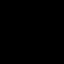

error 1 [1.4155740e-06 7.0633627e-07 9.8485015e-02 5.1254989e-04 8.9984953e-01
 1.1508157e-03 7.8108943e-11] 0 4 snikers milky-way 0_augmented_1603181883-998379_jpg.rf.e7b0554b1490fe03850180d6573477f3.jpg


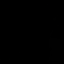

error 2 [1.6297217e-06 3.3281611e-09 4.5611495e-03 4.9770402e-05 9.9333465e-01
 2.0526710e-03 4.1478310e-12] 0 4 snikers milky-way 0_1603181883-998379_jpg.rf.e7b0554b1490fe03850180d6573477f3.jpg


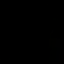

error 3 [7.3665085e-08 2.0304868e-13 4.9187518e-05 1.8626785e-06 9.9728537e-01
 2.6634641e-03 8.8845000e-16] 0 4 snikers milky-way 0_augmented_1603181894-0784204_jpg.rf.20a377285310e66196ded55b596a4921.jpg


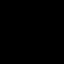

error 4 [4.9347644e-08 2.0100368e-09 7.2217975e-03 7.9248479e-05 9.9225509e-01
 4.4386016e-04 3.8748976e-13] 0 4 snikers milky-way 0_1603181894-0784204_jpg.rf.20a377285310e66196ded55b596a4921.jpg


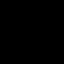

error 5 [3.0781006e-08 3.0008121e-10 6.3454668e-04 1.4831629e-04 9.9902356e-01
 1.9351786e-04 2.5699464e-12] 0 4 snikers milky-way 0_1603178003-9070907_jpg.rf.3e6458d50deeeb39d8f39e110889f5f9.jpg


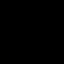

error 6 [9.8462266e-08 6.0265911e-08 2.5577489e-01 3.2541703e-04 7.4312919e-01
 7.7033555e-04 1.0524287e-12] 0 4 snikers milky-way 0_augmented_1603181936-4395802_jpg.rf.c93df5b2c446da9ee4309bbdd23a1c26.jpg


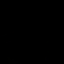

error 7 [7.0783670e-08 3.8663284e-11 1.2543985e-03 1.8776396e-05 9.9767846e-01
 1.0483131e-03 2.4082124e-14] 0 4 snikers milky-way 0_augmented_1603181924-3699586_jpg.rf.69df7fbad62f61f367971718fff8ef6e.jpg


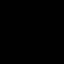

error 8 [3.2177038e-08 7.5914564e-10 7.5474015e-04 9.6954689e-05 9.9896240e-01
 1.8590986e-04 5.0007585e-12] 0 4 snikers milky-way 0_1603178009-3929827_jpg.rf.5be894c1872f147cafa811256ec0f935.jpg


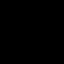

error 9 [2.24006040e-08 1.21719079e-09 1.38611172e-03 1.02100064e-04
 9.98351336e-01 1.60452168e-04 3.19556968e-12] 0 4 snikers milky-way 0_augmented_1603178009-3929827_jpg.rf.5be894c1872f147cafa811256ec0f935.jpg


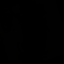

error 10 [1.6492351e-07 7.4544431e-08 1.9247435e-01 4.1967494e-04 8.0617404e-01
 9.3158695e-04 2.6960478e-12] 0 4 snikers milky-way 0_1603181936-4395802_jpg.rf.c93df5b2c446da9ee4309bbdd23a1c26.jpg


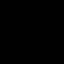

error 11 [4.1349256e-08 1.3758277e-11 5.9377524e-04 1.4452929e-05 9.9851698e-01
 8.7479601e-04 1.4357332e-14] 0 4 snikers milky-way 0_1603181924-3699586_jpg.rf.69df7fbad62f61f367971718fff8ef6e.jpg


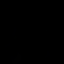

error 12 [2.5158228e-10 4.2961697e-06 4.1522781e-05 9.9912053e-01 8.1675191e-04
 1.6733489e-08 1.6791077e-05] 1 3 twix mars 0_1603178228-1843789_jpg.rf.8984789056197ccbb7ae593c3940bb88.jpg


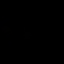

error 13 [6.54191035e-10 1.49799185e-02 5.21065772e-01 4.63710099e-01
 2.43812872e-04 1.30329425e-07 2.60679599e-07] 1 2 twix galaxy 0_augmented_1603182167-4836106_jpg.rf.4559550a68accb90d3cf7a504a826c70.jpg


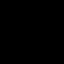

error 14 [4.8147442e-10 2.3423285e-05 1.5510271e-04 9.9805295e-01 1.7461542e-03
 3.1576683e-08 2.2252056e-05] 1 3 twix mars 0_1603182257-5065613_jpg.rf.97473d1883dfcbec028d4d1add356ef4.jpg


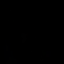

error 15 [2.2140099e-09 4.6167792e-05 4.4188407e-04 9.9845099e-01 1.0480050e-03
 1.9127103e-07 1.2695307e-05] 1 3 twix mars 0_augmented_1603182182-3963134_jpg.rf.f87bbfeb6b9f84e0584d73b4ff32aebc.jpg


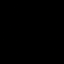

error 16 [1.1816494e-09 2.5647025e-05 5.0650574e-03 9.8880786e-01 6.0995123e-03
 6.4752481e-07 1.1452674e-06] 1 3 twix mars 0_1603182167-4836106_jpg.rf.4559550a68accb90d3cf7a504a826c70.jpg


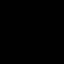

error 17 [7.7299367e-10 8.1376893e-05 1.5195372e-03 9.9739110e-01 1.0040884e-03
 9.2282519e-08 3.8960679e-06] 1 3 twix mars 0_1603182182-3963134_jpg.rf.f87bbfeb6b9f84e0584d73b4ff32aebc.jpg


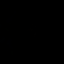

error 18 [6.7190950e-07 3.2093339e-03 9.5733327e-01 2.5294365e-02 1.4096077e-02
 6.5996697e-05 1.9895940e-07] 1 2 twix galaxy 0_augmented_1603182184-6929533_jpg.rf.76cb3368761a136d01a82a33dd93991b.jpg


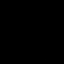

error 19 [1.5173455e-11 1.1160296e-05 9.2912094e-05 9.9979275e-01 1.0057773e-04
 2.7154781e-09 2.5608751e-06] 1 3 twix mars 0_1603178161-1233668_jpg.rf.6ff47f833eefd080868f97dafa4e2569.jpg


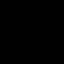

error 20 [3.0197987e-06 2.1849411e-05 8.9455730e-01 7.1532669e-04 1.0283264e-01
 1.8698991e-03 1.9994284e-10] 1 2 twix galaxy 0_augmented_1603178196-0556433_jpg.rf.315ec5ffb47a57bb8d49337ded36c26d.jpg


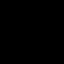

error 21 [4.8601270e-09 1.1568386e-04 1.1530728e-02 9.6107370e-01 2.7276253e-02
 1.0431449e-06 2.5507002e-06] 1 3 twix mars 0_1603178166-5422456_jpg.rf.bfa21d70e31d2071c381a80877bfec45.jpg


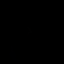

error 22 [1.7182074e-10 1.0709982e-04 4.9244449e-04 9.9871922e-01 6.6070439e-04
 9.8475548e-09 2.0515194e-05] 1 3 twix mars 0_1603182184-6929533_jpg.rf.76cb3368761a136d01a82a33dd93991b.jpg


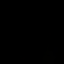

error 23 [5.0945181e-10 3.1702319e-04 9.8937104e-05 9.9930608e-01 1.1413727e-04
 8.1358982e-09 1.6374704e-04] 1 3 twix mars 0_1603182259-0091825_jpg.rf.bc7dd63bb6c4e520dbe8cf0ebae60b9a.jpg


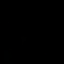

error 24 [4.5205392e-10 1.0161574e-04 1.7719381e-03 9.9725717e-01 8.6535554e-04
 5.3116704e-08 3.8147950e-06] 1 3 twix mars 0_1603182159-4005365_jpg.rf.5a863d1b4c0ba4cc460f029545ecba25.jpg


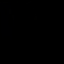

error 25 [1.7045947e-10 4.5525121e-07 8.6439555e-05 9.9187696e-01 8.0344025e-03
 7.4978288e-08 1.6057077e-06] 1 3 twix mars 0_augmented_1603178161-1233668_jpg.rf.6ff47f833eefd080868f97dafa4e2569.jpg


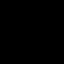

error 26 [2.1918185e-09 1.1202304e-02 8.1623651e-02 9.0689093e-01 2.8125788e-04
 1.6098572e-07 1.5832967e-06] 1 3 twix mars 0_augmented_1603178224-4500935_jpg.rf.824b8c049ea640aa1707092f2df41a79.jpg


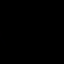

error 27 [1.8247792e-06 1.4902102e-05 8.9839059e-01 3.3790676e-04 1.0021272e-01
 1.0420801e-03 4.6425062e-11] 1 2 twix galaxy 0_augmented_1603182247-326405_jpg.rf.05aa230f51ae13cae207472429ca87d7.jpg


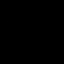

error 28 [1.30625025e-11 5.53106293e-05 1.18846860e-04 9.99595821e-01
 2.08835307e-04 5.30838373e-10 2.12333143e-05] 1 3 twix mars 0_augmented_1603178218-815067_jpg.rf.f9c5d2c76ee0543db0c3af63e39f5173.jpg


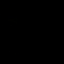

error 29 [9.48283763e-09 1.09520915e-04 1.80915836e-02 9.31332350e-01
 5.04618697e-02 2.51164170e-06 2.06096661e-06] 1 3 twix mars 0_augmented_1603178166-5422456_jpg.rf.bfa21d70e31d2071c381a80877bfec45.jpg


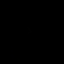

error 30 [1.0151697e-11 8.7985973e-07 4.7021407e-05 9.9938893e-01 5.6234229e-04
 2.1291366e-09 7.7395470e-07] 1 3 twix mars 0_augmented_1603178228-1843789_jpg.rf.8984789056197ccbb7ae593c3940bb88.jpg


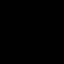

error 31 [3.8712440e-11 2.9650713e-05 2.2824242e-04 9.9957389e-01 1.6530491e-04
 5.1024798e-09 2.9430337e-06] 1 3 twix mars 0_1603178224-4500935_jpg.rf.824b8c049ea640aa1707092f2df41a79.jpg


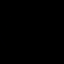

error 32 [6.0374752e-12 1.3751897e-05 9.2919239e-05 9.9965608e-01 2.3005367e-04
 6.6950545e-10 7.2367125e-06] 1 3 twix mars 0_1603178196-0556433_jpg.rf.315ec5ffb47a57bb8d49337ded36c26d.jpg


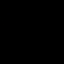

error 33 [1.7110153e-12 4.4219910e-06 4.9495338e-06 9.9978536e-01 1.4426278e-04
 6.3411144e-11 6.0992326e-05] 1 3 twix mars 0_1603182247-326405_jpg.rf.05aa230f51ae13cae207472429ca87d7.jpg


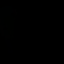

error 34 [3.3500713e-11 6.4287303e-07 5.5115975e-06 9.9851233e-01 1.4543079e-03
 4.1462056e-09 2.7262788e-05] 1 3 twix mars 0_augmented_1603182257-5065613_jpg.rf.97473d1883dfcbec028d4d1add356ef4.jpg


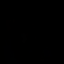

error 35 [8.7479329e-12 5.7269364e-05 1.0279781e-04 9.9966276e-01 1.5620833e-04
 3.3892436e-10 2.0912761e-05] 1 3 twix mars 0_1603178218-815067_jpg.rf.f9c5d2c76ee0543db0c3af63e39f5173.jpg


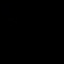

error 36 [8.7851964e-05 1.4001834e-05 9.9514246e-02 6.4852838e-03 8.6196405e-01
 3.1934492e-02 5.3390071e-08] 1 4 twix milky-way 0_augmented_1603182259-0091825_jpg.rf.bc7dd63bb6c4e520dbe8cf0ebae60b9a.jpg


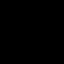

error 37 [1.6962080e-07 4.4291129e-04 1.5072253e-01 7.2355717e-01 1.2522846e-01
 4.6443518e-05 2.2645092e-06] 1 3 twix mars 0_augmented_1603182159-4005365_jpg.rf.5a863d1b4c0ba4cc460f029545ecba25.jpg


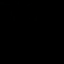

error 38 [1.1450752e-08 9.5250762e-01 1.3138049e-02 3.4305464e-02 1.1110095e-05
 1.6804684e-08 3.7721278e-05] 2 1 galaxy twix 0_1603181528-4985409_jpg.rf.ae75cd3733d314aeeffbc9c228be0798.jpg


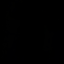

error 39 [4.9150457e-09 9.8148477e-01 6.4779134e-03 1.2026555e-02 2.0354005e-06
 3.0354215e-09 8.7558465e-06] 2 1 galaxy twix 0_1603181484-792053_jpg.rf.d1dad30cbb2a751cd0763376f16b0e2b.jpg


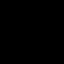

error 40 [7.3831945e-09 9.3142414e-01 3.9162587e-02 2.9392662e-02 1.1752545e-05
 2.2935556e-08 8.8340121e-06] 2 1 galaxy twix 0_1603181447-3928342_jpg.rf.0de7cabd3078ec6422462927f5ffda58.jpg


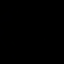

error 41 [3.9995012e-09 9.9454558e-01 1.1012999e-03 4.3306523e-03 1.3055161e-06
 1.9276611e-09 2.1234711e-05] 2 1 galaxy twix 0_augmented_1603181460-1828845_jpg.rf.7cfec26deb8391e08a44e5d3fce5d071.jpg


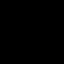

error 42 [2.8350183e-11 9.9090999e-01 3.8973712e-03 5.1890514e-03 3.3007294e-07
 4.1083290e-11 3.2471569e-06] 2 1 galaxy twix 0_augmented_1603181523-7201443_jpg.rf.18b760a11ee8dd40036973d6101a6fc4.jpg


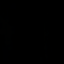

error 43 [1.1912634e-08 9.5229417e-01 1.3958212e-02 3.3700060e-02 1.0930257e-05
 1.7975454e-08 3.6594374e-05] 2 1 galaxy twix 0_augmented_1603181528-4985409_jpg.rf.ae75cd3733d314aeeffbc9c228be0798.jpg


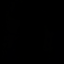

error 44 [2.7094660e-09 9.7340965e-01 8.5521201e-03 1.8022098e-02 5.5024784e-06
 3.3864549e-09 1.0578839e-05] 2 1 galaxy twix 0_augmented_1603177590-0208824_jpg.rf.930f1458ecf7410f1b7fa2526ab3bb33.jpg


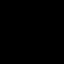

error 45 [2.9602459e-10 9.9639386e-01 1.0557546e-03 2.5449544e-03 1.1558330e-07
 1.8444396e-10 5.3186650e-06] 2 1 galaxy twix 0_augmented_1603181482-58147_jpg.rf.cf6e72b475e677a38cb9f92706db9df0.jpg


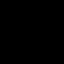

error 46 [7.8325577e-09 9.7628129e-01 9.9605042e-03 1.3745044e-02 3.3435192e-06
 5.9667253e-09 9.8041764e-06] 2 1 galaxy twix 0_augmented_1603181484-792053_jpg.rf.d1dad30cbb2a751cd0763376f16b0e2b.jpg


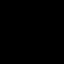

error 48 [4.4616537e-09 9.6673208e-01 8.4518241e-03 2.4779325e-02 6.7582059e-06
 9.9471764e-09 2.9950357e-05] 2 1 galaxy twix 0_1603181455-832171_jpg.rf.66994a3e0e0134546dbc1857414aa7af.jpg


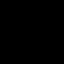

error 49 [7.6042950e-09 9.0933782e-01 5.5700663e-02 3.4940325e-02 1.4124242e-05
 2.7570115e-08 6.9935140e-06] 2 1 galaxy twix 0_augmented_1603181447-3928342_jpg.rf.0de7cabd3078ec6422462927f5ffda58.jpg


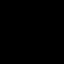

error 50 [9.5537876e-11 9.9847382e-01 1.9801951e-04 1.2570316e-03 7.2710606e-08
 2.0270155e-11 7.1026581e-05] 2 1 galaxy twix 0_1603181504-7111418_jpg.rf.6ef64043800a8c4cbedf96e7ea6af612.jpg


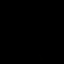

error 51 [2.8392391e-09 9.9256212e-01 1.7879641e-03 5.6158695e-03 1.0888454e-06
 2.6952636e-09 3.2985638e-05] 2 1 galaxy twix 0_1603181460-1828845_jpg.rf.7cfec26deb8391e08a44e5d3fce5d071.jpg


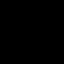

error 53 [5.1336722e-09 9.5668834e-01 8.6966343e-03 3.4550656e-02 1.2526814e-05
 1.1252134e-08 5.1752490e-05] 2 1 galaxy twix 0_augmented_1603181488-5857441_jpg.rf.e2326c68132a20d14d1fb34219946d5f.jpg


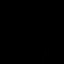

error 54 [5.2103002e-09 9.7881353e-01 6.7951800e-03 1.4372562e-02 5.1388229e-06
 5.8574390e-09 1.3646641e-05] 2 1 galaxy twix 0_1603177590-0208824_jpg.rf.930f1458ecf7410f1b7fa2526ab3bb33.jpg


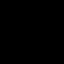

error 55 [2.5617473e-09 9.7346222e-01 1.0439502e-02 1.6091371e-02 1.6816916e-06
 3.5680074e-09 5.3353401e-06] 2 1 galaxy twix 0_1603181482-58147_jpg.rf.cf6e72b475e677a38cb9f92706db9df0.jpg


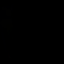

error 56 [9.1882528e-09 9.7367328e-01 1.1486129e-02 1.4809750e-02 8.8788092e-06
 1.7038827e-08 2.1932345e-05] 2 1 galaxy twix 0_1603181488-5857441_jpg.rf.e2326c68132a20d14d1fb34219946d5f.jpg


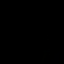

error 57 [3.4144357e-11 9.9758637e-01 8.4996672e-04 1.5580583e-03 8.1289677e-08
 2.0770916e-11 5.5528985e-06] 2 1 galaxy twix 0_1603181523-7201443_jpg.rf.18b760a11ee8dd40036973d6101a6fc4.jpg


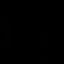

error 58 [8.9069783e-09 1.9502566e-05 9.9712163e-01 2.9650342e-04 2.5427858e-03
 1.9624360e-05 1.0340560e-11] 3 2 mars galaxy 0_1603181647-141739_jpg.rf.6078915c1a76149773739546e8c85413.jpg


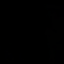

error 59 [1.6305194e-08 1.0844757e-05 9.9515909e-01 1.5516725e-04 4.6614106e-03
 1.3372062e-05 3.3488704e-12] 3 2 mars galaxy 0_1603177788-9081333_jpg.rf.591943b536c15e1e4da612d391519880.jpg


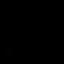

error 60 [1.8798193e-08 6.5231528e-05 9.9695086e-01 5.7067262e-04 2.4066612e-03
 6.5479871e-06 6.7008163e-11] 3 2 mars galaxy 0_1603177769-9036794_jpg.rf.5ceeea2ddd1f55ab04e55c0ff6af535b.jpg


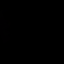

error 61 [1.2709205e-09 1.1412838e-05 9.9967194e-01 1.2164148e-05 3.0359084e-04
 9.0762234e-07 7.6418547e-14] 3 2 mars galaxy 0_augmented_1603181637-771763_jpg.rf.e34bcdfc65fa09a178a03a83ee032c66.jpg


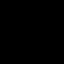

error 62 [2.1682952e-08 1.6792912e-06 9.4623256e-01 8.3138765e-04 5.2710164e-02
 2.2423106e-04 6.9932428e-12] 3 2 mars galaxy 0_augmented_1603181647-141739_jpg.rf.6078915c1a76149773739546e8c85413.jpg


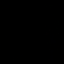

error 63 [5.9439270e-07 2.7918984e-06 9.6721298e-01 2.6935345e-04 3.1221392e-02
 1.2929828e-03 5.0560047e-12] 3 2 mars galaxy 0_augmented_1603181655-4060388_jpg.rf.3a13623c324adffcc2de411542e27088.jpg


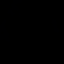

error 64 [8.2974996e-09 4.5548019e-05 9.9800855e-01 3.5832918e-04 1.5840471e-03
 3.5533690e-06 2.0496448e-11] 3 2 mars galaxy 0_augmented_1603177769-9036794_jpg.rf.5ceeea2ddd1f55ab04e55c0ff6af535b.jpg


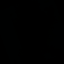

error 65 [1.4581564e-09 3.7097011e-06 9.9889553e-01 2.5571659e-05 1.0723225e-03
 2.8255122e-06 8.6506675e-14] 3 2 mars galaxy 0_1603181637-771763_jpg.rf.e34bcdfc65fa09a178a03a83ee032c66.jpg


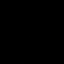

error 66 [8.84404372e-08 1.52459115e-05 9.93338645e-01 4.17956384e-04
 6.11514365e-03 1.12856338e-04 1.81305023e-11] 3 2 mars galaxy 0_1603181655-4060388_jpg.rf.3a13623c324adffcc2de411542e27088.jpg


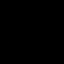

error 67 [1.43376395e-08 1.37745097e-04 9.92448330e-01 2.50921841e-03
 4.89574019e-03 8.99005136e-06 1.13885797e-10] 3 2 mars galaxy 0_1603181629-9233887_jpg.rf.c978348c933d2ea69b1c1723c35300d0.jpg


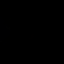

error 68 [4.6365813e-06 5.9254478e-05 9.6357077e-01 1.8363070e-03 3.3202142e-02
 1.3269867e-03 1.4020262e-09] 3 2 mars galaxy 0_1603181687-9610589_jpg.rf.aa5c2af6f3392399111692f2867e9460.jpg


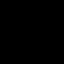

error 69 [2.6655458e-09 1.2552849e-04 9.4962937e-01 3.1187076e-02 1.9056169e-02
 1.8323864e-06 1.5377288e-09] 3 2 mars galaxy 0_augmented_1603177788-9081333_jpg.rf.591943b536c15e1e4da612d391519880.jpg


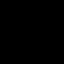

error 70 [8.8977661e-09 4.5027982e-06 9.9564409e-01 5.5719371e-05 4.2738887e-03
 2.1899907e-05 2.4536644e-13] 3 2 mars galaxy 0_augmented_1603181625-4748044_jpg.rf.5e7696b83291e27e1c00f72c9c9183ca.jpg


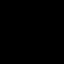

error 71 [1.1940333e-09 6.4957960e-05 9.9889827e-01 3.4082963e-04 6.9486618e-04
 1.0123252e-06 3.6705248e-12] 3 2 mars galaxy 0_augmented_1603181629-9233887_jpg.rf.c978348c933d2ea69b1c1723c35300d0.jpg


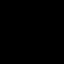

error 72 [7.2634884e-07 5.5399275e-04 9.9663663e-01 1.0478927e-03 1.6866751e-03
 7.4067335e-05 3.4857675e-09] 3 2 mars galaxy 0_augmented_1603181687-9610589_jpg.rf.aa5c2af6f3392399111692f2867e9460.jpg


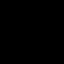

error 73 [5.3247184e-10 4.7690255e-06 9.9959356e-01 1.5139938e-05 3.8574808e-04
 7.6936675e-07 4.6309002e-14] 3 2 mars galaxy 0_1603181625-4748044_jpg.rf.5e7696b83291e27e1c00f72c9c9183ca.jpg


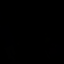

error 74 [4.2855056e-04 6.3899884e-12 1.6004223e-04 5.6637013e-08 1.8399758e-03
 9.9757141e-01 1.1770321e-16] 4 5 milky-way bounty 0_1603181832-4201481_jpg.rf.c82ae34a83474b93b1db93245d722fff.jpg


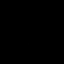

error 75 [3.9600764e-06 2.9525920e-04 9.5428389e-01 1.2208276e-03 4.3499634e-02
 6.9636363e-04 2.1369151e-09] 4 2 milky-way galaxy 0_augmented_1603181745-1781971_jpg.rf.a0cd3710bb0e048778a05f9ea9e643bf.jpg


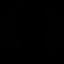

error 76 [8.6396765e-03 5.2196308e-10 5.8411906e-04 3.0862743e-08 1.9167796e-04
 9.9058443e-01 8.7592688e-16] 4 5 milky-way bounty 0_augmented_1603177912-096819_jpg.rf.d14865ba0e5dd26a84dae2d585475182.jpg


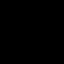

error 77 [1.4146876e-03 5.1687309e-12 7.2394265e-05 1.1307277e-08 3.7859150e-04
 9.9813432e-01 4.7598480e-17] 4 5 milky-way bounty 0_1603177912-096819_jpg.rf.d14865ba0e5dd26a84dae2d585475182.jpg


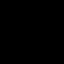

error 78 [2.5380292e-04 6.5085281e-12 9.7387143e-05 2.7368381e-08 8.5912138e-04
 9.9878961e-01 1.2218249e-16] 4 5 milky-way bounty 0_1603181768-092227_jpg.rf.5aa6fb56ba122c5d07e1fb4e78c88cf1.jpg


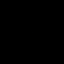

error 79 [7.2618946e-03 7.7561464e-12 6.5599001e-05 2.8775371e-09 3.5157613e-05
 9.9263740e-01 7.6405656e-18] 4 5 milky-way bounty 0_augmented_1603181832-4201481_jpg.rf.c82ae34a83474b93b1db93245d722fff.jpg


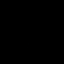

error 80 [6.8645220e-04 1.2776887e-12 2.4011140e-05 9.2387955e-09 3.6590101e-04
 9.9892360e-01 3.7130765e-17] 4 5 milky-way bounty 0_augmented_1603181836-4843104_jpg.rf.490d66abcebcd7b96bc260ae40a3a546.jpg


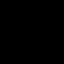

error 81 [2.1764022e-06 1.3024067e-04 9.6120423e-01 4.4705326e-04 3.7526850e-02
 6.8935374e-04 2.3111821e-10] 4 2 milky-way galaxy 0_augmented_1603177888-525819_jpg.rf.c59547726ef392a3418c28171af851e1.jpg


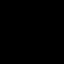

error 82 [5.7434948e-04 4.4814382e-12 1.5202985e-04 6.6626016e-09 1.0766245e-03
 9.9819702e-01 1.6503931e-17] 4 5 milky-way bounty 0_1603181766-7543292_jpg.rf.1dd64674221d8e81d2bca058f7b0793b.jpg


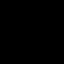

error 83 [9.8931007e-05 5.2469968e-12 4.7326431e-04 3.1439669e-08 2.8620947e-03
 9.9656564e-01 1.3098444e-17] 4 5 milky-way bounty 0_augmented_1603181768-092227_jpg.rf.5aa6fb56ba122c5d07e1fb4e78c88cf1.jpg


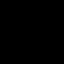

error 84 [1.7444944e-03 8.4132895e-11 5.5233180e-04 5.5970652e-08 2.3668916e-03
 9.9533623e-01 6.8029748e-16] 4 5 milky-way bounty 0_1603181745-1781971_jpg.rf.a0cd3710bb0e048778a05f9ea9e643bf.jpg


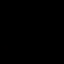

error 85 [2.8710594e-04 1.0462858e-11 2.8935081e-04 3.9725336e-08 2.7764740e-03
 9.9664706e-01 6.8995413e-17] 4 5 milky-way bounty 0_1603177888-525819_jpg.rf.c59547726ef392a3418c28171af851e1.jpg


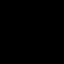

error 86 [1.6141721e-04 7.0313417e-12 1.3164598e-03 9.5285104e-09 3.5167453e-03
 9.9500531e-01 2.6045206e-18] 4 5 milky-way bounty 0_augmented_1603181766-7543292_jpg.rf.1dd64674221d8e81d2bca058f7b0793b.jpg


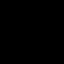

error 87 [7.1029051e-04 1.0006125e-12 2.0039735e-05 7.9581417e-09 3.4059756e-04
 9.9892908e-01 3.1382842e-17] 4 5 milky-way bounty 0_1603181836-4843104_jpg.rf.490d66abcebcd7b96bc260ae40a3a546.jpg


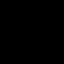

error 88 [6.5357512e-05 5.5109400e-14 1.0896544e-05 3.1952208e-08 8.2628743e-04
 9.9909735e-01 1.0071551e-17] 4 5 milky-way bounty 0_augmented_1603177942-7390945_jpg.rf.3adf32c7a74d13a08c126139d3fc15b8.jpg


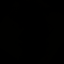

error 89 [1.11877554e-04 2.21536209e-13 2.35854932e-05 5.52217259e-08
 1.81483792e-03 9.98049617e-01 6.15368311e-17] 4 5 milky-way bounty 0_1603177942-7390945_jpg.rf.3adf32c7a74d13a08c126139d3fc15b8.jpg


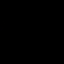

error 91 [9.9953902e-01 2.6971531e-20 1.5078728e-12 1.8899654e-16 6.3754783e-12
 4.6101288e-04 3.8917045e-26] 5 0 bounty snikers 0_1603180550-9419968_jpg.rf.602bd85cbd672154ab06e9d0bdf0683e.jpg


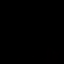

error 92 [9.9999249e-01 5.1660205e-20 1.6406704e-13 4.3342287e-18 1.7432855e-14
 7.4825248e-06 4.2906642e-27] 5 0 bounty snikers 0_augmented_1603181401-021662_jpg.rf.72b5d44a168b57c696ab61424795de0d.jpg


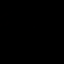

error 93 [9.9797553e-01 1.7193787e-18 3.9992527e-11 1.1670143e-15 2.7920936e-11
 2.0244441e-03 4.6106800e-25] 5 0 bounty snikers 0_1603180541-2748477_jpg.rf.3b95ce279db677e39e1fe2a623f426c8.jpg


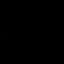

error 94 [9.9967968e-01 1.5097883e-20 1.3606832e-12 3.1627036e-17 9.0181806e-13
 3.2039083e-04 2.9160727e-27] 5 0 bounty snikers 0_1603181390-1830106_jpg.rf.9a4b23135771addd38961826f3d9d3e7.jpg


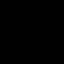

error 95 [9.99496341e-01 1.02907996e-19 2.65251709e-12 5.00155115e-16
 5.65426352e-12 5.03595627e-04 1.78588914e-25] 5 0 bounty snikers 0_augmented_1603181385-8930101_jpg.rf.ce1e67cc4343d978edec7e0000026208.jpg


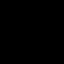

error 96 [9.5902830e-01 5.6794973e-16 4.9275943e-09 7.8265215e-13 1.5424785e-08
 4.0971663e-02 2.9170639e-21] 5 0 bounty snikers 0_1603177472-4112854_jpg.rf.8dc48070c5a473d186c11a6bc00b61d3.jpg


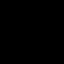

error 97 [7.5586098e-01 3.7630905e-12 4.4982371e-06 9.3807788e-11 7.9827959e-07
 2.4413374e-01 1.5721773e-18] 5 0 bounty snikers 0_augmented_1603181581-8432302_jpg.rf.ef28742f7a2e7b455940c4710ad1054b.jpg


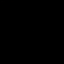

error 98 [9.9196941e-01 1.5451482e-17 3.0903441e-10 3.6860302e-14 1.1338559e-09
 8.0306623e-03 3.9866481e-23] 5 0 bounty snikers 0_1603177435-2590907_jpg.rf.6d689c803f67480aa27e657199f83c35.jpg


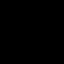

error 99 [9.9168688e-01 1.9099574e-17 3.4608277e-10 4.2693473e-14 1.1802288e-09
 8.3130579e-03 5.0534818e-23] 5 0 bounty snikers 0_augmented_1603177435-2590907_jpg.rf.6d689c803f67480aa27e657199f83c35.jpg


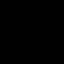

error 100 [2.5470552e-04 4.9083294e-05 1.7382260e-01 3.7861019e-03 7.5327379e-01
 6.8813667e-02 6.8046532e-08] 5 4 bounty milky-way 0_augmented_1603177472-4112854_jpg.rf.8dc48070c5a473d186c11a6bc00b61d3.jpg


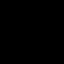

error 101 [9.8944932e-01 4.3673499e-17 7.7602003e-10 8.1884186e-14 1.9129318e-09
 1.0550639e-02 4.7701772e-23] 5 0 bounty snikers 0_1603181407-5963583_jpg.rf.36755702fcfb66488c606547a3e27908.jpg


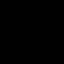

error 102 [9.9885082e-01 9.5920722e-19 1.8487434e-11 1.0795375e-15 2.7385734e-11
 1.1491554e-03 6.0177248e-25] 5 0 bounty snikers 0_1603181396-4380922_jpg.rf.b7720afe966f00fdd5f94292dc922601.jpg


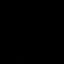

error 103 [9.9999690e-01 1.7602123e-22 6.5313787e-15 5.4078370e-20 4.3302034e-16
 3.0889405e-06 3.7493538e-30] 5 0 bounty snikers 0_augmented_1603181390-1830106_jpg.rf.9a4b23135771addd38961826f3d9d3e7.jpg


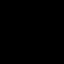

error 104 [9.9572927e-01 2.7288862e-18 1.1016324e-10 2.3439943e-15 1.4087459e-10
 4.2706570e-03 8.7802704e-25] 5 0 bounty snikers 0_1603181581-8432302_jpg.rf.ef28742f7a2e7b455940c4710ad1054b.jpg


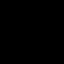

error 105 [9.9441117e-01 2.4559555e-17 3.6705183e-10 2.9422926e-14 7.9919582e-10
 5.5888384e-03 2.3085670e-23] 5 0 bounty snikers 0_augmented_1603177667-0270965_jpg.rf.afcbe60d26f6ab69dc62c3ae4a6bae25.jpg


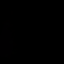

error 107 [9.9119508e-01 8.7483094e-14 5.4729401e-08 2.9954535e-12 9.3154640e-09
 8.8049490e-03 6.6589739e-20] 5 0 bounty snikers 0_augmented_1603181592-1727066_jpg.rf.de5cb99cd20c79017110593e8d92c106.jpg


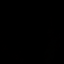

error 108 [1.8953312e-04 2.3279815e-04 6.6044044e-01 3.1942765e-03 3.0505097e-01
 3.0891951e-02 3.7728800e-08] 5 2 bounty galaxy 0_augmented_1603180536-3617759_jpg.rf.d1e03918f8ced169daf21c59224fdac1.jpg


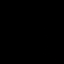

error 109 [9.9716634e-01 5.4146346e-17 3.8665285e-10 2.4543511e-14 8.0470791e-10
 2.8336451e-03 4.7954394e-23] 5 0 bounty snikers 0_1603181401-021662_jpg.rf.72b5d44a168b57c696ab61424795de0d.jpg


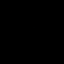

error 110 [9.9770290e-01 8.7496394e-19 4.3552863e-11 2.7490562e-15 1.3874667e-10
 2.2970987e-03 4.6878695e-25] 5 0 bounty snikers 0_1603180536-3617759_jpg.rf.d1e03918f8ced169daf21c59224fdac1.jpg


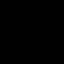

error 111 [9.9880445e-01 1.8931467e-19 1.0389928e-11 1.7023185e-16 3.5956860e-12
 1.1955679e-03 2.2286481e-26] 5 0 bounty snikers 0_1603181379-5098107_jpg.rf.934093bc232fb6fd1c8c76683afa62e4.jpg


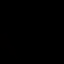

error 112 [9.9874842e-01 1.1398387e-19 8.8486414e-12 1.4544951e-16 5.2888978e-12
 1.2515677e-03 1.6914563e-26] 5 0 bounty snikers 0_augmented_1603180552-664101_jpg.rf.94c3cbf3a5af4d21842c791663b59507.jpg


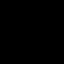

error 113 [9.9708575e-01 3.1219474e-17 2.3598523e-10 1.8835529e-14 5.5790755e-10
 2.9142224e-03 3.9978966e-23] 5 0 bounty snikers 0_1603181375-300122_jpg.rf.d642db28e1d78827bcc6fe1ccef79546.jpg


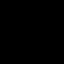

error 114 [9.8717695e-01 3.2429910e-18 1.8259878e-10 9.1339400e-15 5.2055865e-10
 1.2823025e-02 2.3504996e-24] 5 0 bounty snikers 0_augmented_1603180541-2748477_jpg.rf.3b95ce279db677e39e1fe2a623f426c8.jpg


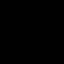

error 116 [7.5122727e-05 1.5099267e-05 1.3541624e-01 2.5554397e-03 8.2209766e-01
 3.9840382e-02 1.0801692e-08] 5 4 bounty milky-way 0_augmented_1603177470-772376_jpg.rf.a1f29eff80fe438a94cfce736cbf2609.jpg


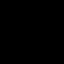

error 118 [9.89111245e-01 8.76768370e-17 1.34810674e-09 3.11496908e-14
 1.42948475e-09 1.08887255e-02 2.33757251e-23] 5 0 bounty snikers 0_1603181571-5566976_jpg.rf.8b70d2f1d4387b4dc71200e11b2b681d.jpg


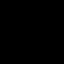

error 119 [9.9614406e-01 7.1459132e-18 1.5277576e-10 1.1044417e-14 3.6086731e-10
 3.8559460e-03 5.6596411e-24] 5 0 bounty snikers 0_1603177667-0270965_jpg.rf.afcbe60d26f6ab69dc62c3ae4a6bae25.jpg


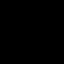

error 120 [9.9353963e-01 9.6307401e-17 7.1616263e-10 1.1595103e-13 2.1921369e-09
 6.4603826e-03 1.5304124e-22] 5 0 bounty snikers 0_augmented_1603181407-5963583_jpg.rf.36755702fcfb66488c606547a3e27908.jpg


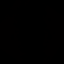

error 121 [9.9960345e-01 1.7271037e-19 5.8399522e-12 4.7687473e-16 1.4898142e-11
 3.9658486e-04 1.5410609e-25] 5 0 bounty snikers 0_1603181592-1727066_jpg.rf.de5cb99cd20c79017110593e8d92c106.jpg


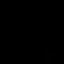

error 122 [9.9985147e-01 1.5063600e-20 6.0153971e-13 4.0592582e-17 7.0508703e-13
 1.4855180e-04 6.9802619e-27] 5 0 bounty snikers 0_augmented_1603181377-3090358_jpg.rf.d45efc168155d3e6d44eec825970b6b0.jpg


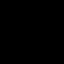

error 123 [9.9999857e-01 1.4025305e-23 6.5478770e-16 2.3597836e-20 1.9299967e-16
 1.4515977e-06 9.4200262e-31] 5 0 bounty snikers 0_augmented_1603180550-9419968_jpg.rf.602bd85cbd672154ab06e9d0bdf0683e.jpg


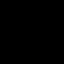

error 124 [9.9738044e-01 5.7405890e-19 4.4111371e-11 1.0547265e-15 6.6224817e-11
 2.6195517e-03 1.4623089e-25] 5 0 bounty snikers 0_1603177470-772376_jpg.rf.a1f29eff80fe438a94cfce736cbf2609.jpg


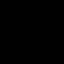

error 125 [9.9980873e-01 3.8288765e-21 4.5347360e-13 2.1123099e-17 7.6533642e-13
 1.9129136e-04 1.2649155e-27] 5 0 bounty snikers 0_1603181377-3090358_jpg.rf.d45efc168155d3e6d44eec825970b6b0.jpg


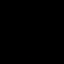

error 126 [8.5590625e-01 4.4646308e-19 2.6487423e-10 2.7592105e-13 2.1160204e-07
 1.4409354e-01 3.6063732e-23] 5 0 bounty snikers 0_augmented_1603181375-300122_jpg.rf.d642db28e1d78827bcc6fe1ccef79546.jpg


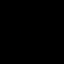

error 127 [9.9905008e-01 2.8471402e-20 3.5709237e-12 5.7861370e-17 2.6862774e-12
 9.4996806e-04 3.9789605e-27] 5 0 bounty snikers 0_1603180552-664101_jpg.rf.94c3cbf3a5af4d21842c791663b59507.jpg


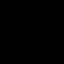

error 128 [9.9494815e-01 3.5060904e-17 3.5603584e-10 1.8408008e-14 6.6566774e-10
 5.0518215e-03 2.7956637e-23] 5 0 bounty snikers 0_1603181383-781753_jpg.rf.d8f32b82157d16ca3c5024c2723f173c.jpg


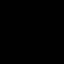

error 129 [9.9942267e-01 6.5158943e-20 2.4755480e-12 2.9141496e-16 5.7984650e-12
 5.7736796e-04 6.5740469e-26] 5 0 bounty snikers 0_1603181385-8930101_jpg.rf.ce1e67cc4343d978edec7e0000026208.jpg


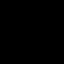

error 131 [5.7949381e-13 1.6645943e-08 1.1062830e-09 8.4896499e-01 4.3370397e-05
 5.3816214e-12 1.5099168e-01] 6 3 Teasers mars 0_augmented_1603178109-569544_jpg.rf.67236502abd99987b3b72a93d1a19fc8.jpg


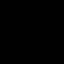

error 133 [4.3094456e-12 7.9115096e-05 5.7118438e-08 5.0850260e-01 2.8078118e-06
 4.3775348e-12 4.9141538e-01] 6 3 Teasers mars 0_1603182041-4469092_jpg.rf.32756b428e56e313bf137ae55743741a.jpg


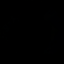

error 134 [1.1613276e-05 2.8025470e-04 9.6939844e-01 1.0137678e-03 2.7966719e-02
 1.3291471e-03 2.7355127e-09] 6 2 Teasers galaxy 0_augmented_1603182003-5799465_jpg.rf.3fa5834a508f9c62b1b6201a0bb90539.jpg


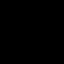

error 136 [1.9184172e-07 3.6472686e-02 2.8041974e-02 9.3051308e-01 4.5743044e-03
 2.6540604e-06 3.9518939e-04] 6 3 Teasers mars 0_augmented_1603182097-792098_jpg.rf.009b5374035f1f3cdd9947cf0c4f5324.jpg


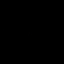

error 139 [2.1096091e-12 7.2370400e-05 9.7303911e-08 5.0093764e-01 3.6613865e-06
 6.1111238e-12 4.9898612e-01] 6 3 Teasers mars 0_augmented_1603182000-2990165_jpg.rf.7f61eebe01c0dcf4894215dc190ce21b.jpg


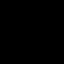

error 140 [9.4390129e-12 4.7084011e-04 1.0654719e-06 7.3243219e-01 8.5017946e-06
 1.9169286e-11 2.6708740e-01] 6 3 Teasers mars 0_augmented_1603182021-3292289_jpg.rf.160b4cc749cd14a6c19031b5ef2cf258.jpg


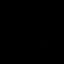

error 142 [5.67343785e-12 2.90421682e-04 4.80610993e-07 6.17421865e-01
 6.29722081e-06 1.03919885e-11 3.82280916e-01] 6 3 Teasers mars 0_1603182021-3292289_jpg.rf.160b4cc749cd14a6c19031b5ef2cf258.jpg


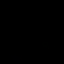

error 144 [8.0040918e-11 5.5660689e-03 1.0899304e-05 8.5964555e-01 2.3338245e-05
 2.1524206e-10 1.3475420e-01] 6 3 Teasers mars 0_1603182097-792098_jpg.rf.009b5374035f1f3cdd9947cf0c4f5324.jpg


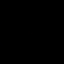

12.0 % training data (sample size 150)


(0.12, 0.0)

In [ ]:
objects_list = np.array(objects_list)
labels_list = np.array(labels_list)
test(model_hersteller, objects_list, labels_list, objects_names, len(objects_list), files_names)

# **Einige Metriken**

Nachdem ich das Modell auf den Testdaten getestet habe, bin ich bereit, die Leistung des Modells zu überprüfen.

## **Genauigkeit der Klassifizierung**

In [ ]:
from sklearn.metrics import accuracy_score

predictions = model_hersteller.predict(objects_list)
y_true = [np.argmax(label) for label in labels_list]
y_pred = [np.argmax(pred) for pred in predictions]

acc = accuracy_score(y_true, y_pred)
print("accuracy:", acc* 100, "%")


5/5 [==============================] - 0s 5ms/step
accuracy: 12.0 %


### Interpretation

Die Ausgabe des Herstellermodells deutet darauf hin, dass das Modell auf dem Testdatensatz nicht gut abschneidet. Die erzielte Genauigkeit liegt bei etwa 12%, was bedeutet, dass das Modell nur etwa ein Achtel der Testbilder korrekt klassifizieren konnte. Dies ist eine relativ niedrige Genauigkeit.



# **Konfusionsmatrix der Klassifizierung**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

[[ 0  0  0  0 12  0  0]
 [ 0  0  4 21  1  0  0]
 [ 0 18  2  0  0  0  0]
 [ 0  0 16  0  0  0  0]
 [ 0  0  2  0  0 14  0]
 [33  0  1  0  2  4  0]
 [ 0  0  1  7  0  0 12]]


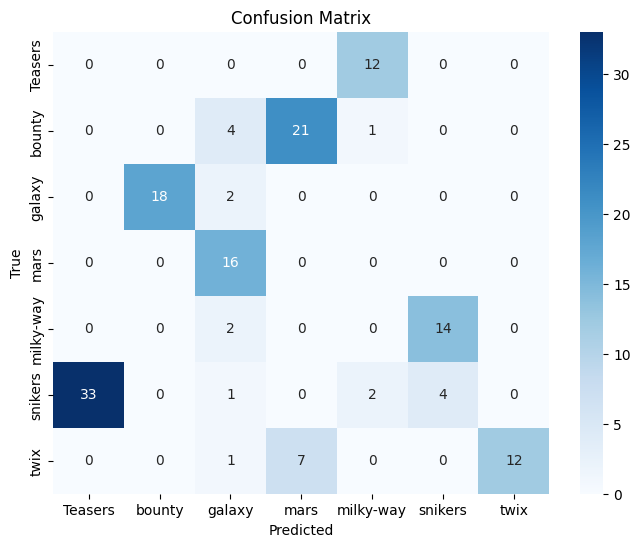

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


 Die Ergebnisse zeigen, dass das Modell tendenziell sehr schlecht darin ist die  Klassen korrekt vorherzusagen und nur mehr Fehler macht.

# **Classification Report**

In [ ]:
class_report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Teasers       0.00      0.00      0.00        12
      bounty       0.00      0.00      0.00        26
      galaxy       0.08      0.10      0.09        20
        mars       0.00      0.00      0.00        16
   milky-way       0.00      0.00      0.00        16
     snikers       0.22      0.10      0.14        40
        twix       1.00      0.60      0.75        20

    accuracy                           0.12       150
   macro avg       0.19      0.11      0.14       150
weighted avg       0.20      0.12      0.15       150




Das Herstellermodell zeigt eine hohe Präzision bei der Vorhersage der Klasse "twix", während die Präzision für die Klasse "snikers" vergleichsweise höher ist. Jedoch sind die meisten Precision-, Recall- und F1-Score-Werte niedrig, was darauf hinweist, dass das Modell Schwierigkeiten hat, relevante Instanzen korrekt zu identifizieren und zu erfassen. Für die Klassen "Teasers", "bounty", "mars" und "milky-way" werden überhaupt keine korrekten Vorhersagen gemacht. Die Recall-Werte sind ebenfalls niedrig, was darauf hinweist, dass viele relevante Instanzen nicht erfasst werden. Die Accuracy des Modells beträgt nur 0.12, was auf eine insgesamt schlechte Klassifizierungsleistung hinweist. Das Herstellermodell benötigt erhebliche Verbesserungen, um seine Leistung zu steigern und eine genauere Klassifizierung zu erreichen.

In [ ]:
y_true = np.array(y_true)
y_true.shape
print("y_true = ",y_true)
y_pred = np.array(y_pred)
print("y_pred = ", y_pred)

y_true =  [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6]
y_pred =  [4 4 4 4 4 4 4 4 4 4 4 4 3 2 3 3 3 3 2 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 4
 3 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 5 2 5 5 5 5 5 2 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 5 0 2 0 0
 0 0 0 0 5 4 5 0 0 0 0 0 0 0 0 0 0 0 0 6 3 6 3 2 6 3 6 6 3 3 6 3 6 3 6 6 6
 6 6]


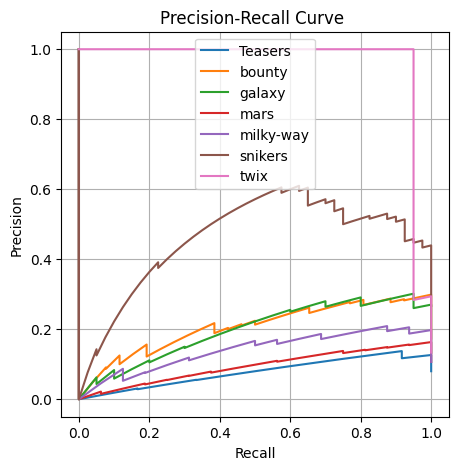

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

for i in range(len(class_names)):
    y_true_class = (y_true == i).astype(int)
    y_pred_class = (y_pred == i).astype(int)
    precision, recall, _ = precision_recall_curve((y_true == i).astype(int), predictions[:, i])
    plt.plot(recall, precision, label=f'{class_names[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve ')
plt.legend()
plt.grid(True)
plt.show()


# **Plotten der Vorhersagebilder**

Ich habe hier einige Hilfsmethoden implementiert, die zum Plotten benutzt werden

In [ ]:
import cv2
import numpy as np

BOX_COLOR = (255, 0, 0)  # color

def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=1):
    x_center, y_center, width_bbox, height_bbox = bbox
    img_width, img_height = img.shape[1], img.shape[0]

    x_min = int((x_center - width_bbox / 2) * img_width)
    y_min = int((y_center - height_bbox / 2) * img_height)
    x_max = int((x_center + width_bbox / 2) * img_width)
    y_max = int((y_center + height_bbox / 2) * img_height)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    return img

def show_image(image, bbox, size = (300,300)):
    image = visualize_bbox(image.copy(), bbox)
    image = cv2.resize(image, size)
    cv2_imshow(image)

def show_result(index , X, y):
  img = np.array(X[index], dtype=np.uint8)
  bbox = y[index][1:]
  show_image(img, bbox)

In [ ]:
predictions = model_hersteller.predict(objects_list)
y_true = [np.argmax(label) for label in labels_list]
y_pred = [np.argmax(pred) for pred in predictions]
y_pred = np.array(y_pred)



5/5 [==============================] - 0s 3ms/step


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def show_prediction_result(data_path, y_pred, number_of_images):
    class_names = ['Teasers', 'bounty', 'galaxy', 'mars', 'milky-way', 'snickers', 'twix']
    subfolders = os.listdir(data_path)
    total_images = 0

    for subfolder in subfolders:
        subfolder_path = os.path.join(data_path, subfolder)
        images_in_subfolder = os.listdir(subfolder_path)
        number_of_images_in_subfolder = min(number_of_images - total_images, len(images_in_subfolder))

        for i in range(number_of_images_in_subfolder):
            image_to_plot = images_in_subfolder[i]
            image_path = os.path.join(subfolder_path, image_to_plot)
            predicted_label_index = y_pred[total_images]  # Entnimmt das i-te Element aus y_pred
            predicted_class_name = class_names[predicted_label_index]
            img = cv2.imread(image_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            fig, ax = plt.subplots(figsize=(2,2))
            ax.imshow(img_rgb)
            ax.set_title(f'Predicted Label: {predicted_class_name}')
            ax.axis('off')
            plt.show()
            total_images += 1
            if total_images >= number_of_images:
                return


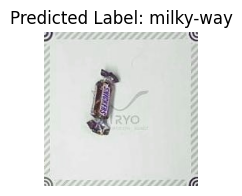

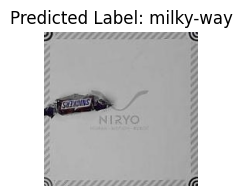

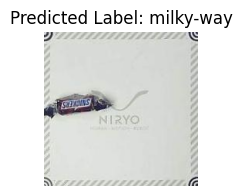

In [ ]:

show_prediction_result('/content/chocolate-bar-project-3/data', y_pred, 3)

# **Eigenes Model erstllen**


In diesem Abschnitt möchte ich mein eigenes Objekterkennungsmodell erstellen. Ich implementiere zuerst eine Hilfsfunktion `load_data`, die die Parameter `images_dir`, `labels_dir`, `class_names` und `target_size` akzeptiert. `images_dir` sind die Pfade zu den Bildern und `labels_dir` sind die Pfade zu den Labels. `class_names` sind die Klassennamen. Nach Ausführung dieser Funktion erhalte ich die richtigen formatierten Daten zum Trainieren, Validieren und Testen des Modells. Zum Beispiel, wenn ich Pfade zu Testdaten angebe, erhalte ich `X_test` und `y_test` als Rückgabewerte

### **Hilfsmethode zum Laden der Daten**

In [ ]:
from tensorflow.keras.preprocessing import image
import os
import numpy as np
class_names = ['Teasers', 'bounty', 'galaxy', 'mars', 'milky-way', 'snickers', 'twix']

def load_data(images_dir, labels_dir, class_names, target_size=(200, 200)):
    images = []
    labels = []

    for img_file in os.listdir(images_dir):
        img_path = os.path.join(images_dir, img_file)
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        images.append(img_array)

        label_file = img_file.replace('.jpg', '.txt')
        label_path = os.path.join(labels_dir, label_file)

        with open(label_path, 'r') as f:
            label = [float(x) for x in f.readline().split()]
            labels.append(label)  # Nur den ersten Index verwenden

    X_test = np.array(images)
    y_test = np.array(labels)

    return X_test, y_test


Nun implementiere ich die Funktion make_model, die mein eigenes Modell erstellt. Da ich einen Objekterkenner erstelle, hat mein Modell zwei Ausgabeköpfe: einer dient der Klassifizierung des Objekttyps (oder Labels oder Klasse), und ein anderer Kopf gibt den Bounding Box des erkannten Objekts aus.

In [ ]:
import tensorflow as tf

def make_model(input_size, NUM_CLASSES):
    inputs = tf.keras.layers.Input(shape=(input_size, input_size, 3))

    # Feature-Extraktion
    x = tf.keras.layers.Conv2D(8, kernel_size=(3,3), activation='relu', padding='same')(inputs)
    x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2)(x)
    x = tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2)(x)
    x = tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2)(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2)(x)
    x = tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2)(x)

    # Adapter
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dense(1000, activation='relu')(x)
    x = tf.keras.layers.Dense(2000, activation='relu')(x)

    # Klassifikationskopf
    classification_head = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax', name='classifier_head')(x)
    # Regressionskopf
    regressor_head = tf.keras.layers.Dense(4, name='regressor_head')(x)

    # Gesamtes Modell
    model = tf.keras.Model(inputs=inputs, outputs=[classification_head, regressor_head])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss={'classifier_head': 'categorical_crossentropy', 'regressor_head': 'mse'},
                  metrics={'classifier_head': 'accuracy', 'regressor_head': 'mse'})

    return model


# **Daten laden**

Nun werde ich `load_data` verwenden, um die Daten aus den Pfaden in das richtige Format zu bringen

In [ ]:
test_image_path = "/content/chocolate-bar-project-3/test/images"
test_labels_path = "/content/chocolate-bar-project-3/test/labels"

train_image_path = "/content/chocolate-bar-project-3/train/images"
train_labels_path = "/content/chocolate-bar-project-3/train/labels"

valid_image_path = "/content/chocolate-bar-project-3/valid/images"
valid_labels_path = "/content/chocolate-bar-project-3/valid/labels"


X_train, y_train = load_data(train_image_path, train_labels_path, class_names)
X_test, y_test = load_data(test_image_path, test_labels_path, class_names)
X_val, y_val = load_data(valid_image_path, valid_labels_path, class_names)

Die Trainingsdaten bestehen aus 3150 Bildern mit einer Größe von 200x200 Pixeln und 3 Farbkanälen (RGB).

In [ ]:
X_train.shape

(1575, 200, 200, 3)

#**Normalizing the training Dataset**

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

Jetzt werde ich das Modell bauen und dann werfe ich einen Blick auf die Architektur des Modells

In [ ]:
input_size = 200 #Height
class_names = ["Teasers", "bounty", "galaxy", "mars", "milky-way", "snickers", "twix"]
CLASSES = len(class_names)
model = make_model(input_size, CLASSES)

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_44 (Conv2D)          (None, 200, 200, 8)          224       ['input_12[0][0]']            
                                                                                                  
 average_pooling2d_44 (Aver  (None, 100, 100, 8)          0         ['conv2d_44[0][0]']           
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_45 (Conv2D)          (None, 100, 100, 16)         1168      ['average_pooling2d_44[0

#**Model Training**

Nun bin ich bereit, das Modell mit Trainings- und Validierungsdaten zu trainieren

In [ ]:
#y_train,y_val in  Klassenindex und  Bounding box splitten
y_train_class = tf.keras.utils.to_categorical(y_train[:, 0], num_classes=len(class_names))
y_train_bbox = y_train[:, 1:]
y_val_class = tf.keras.utils.to_categorical(y_val[:, 0], num_classes=len(class_names))
y_val_bbox = y_val[:, 1:]

history = model.fit(X_train, {'classifier_head': y_train_class, 'regressor_head': y_train_bbox},
          validation_data=(X_val, {'classifier_head': y_val_class, 'regressor_head': y_val_bbox}),
          epochs=30, batch_size=32)


Epoch 1/30
50/50 [==============================] - 7s 51ms/step - loss: 1.9996 - classifier_head_loss: 1.9440 - regressor_head_loss: 0.0555 - classifier_head_accuracy: 0.1752 - regressor_head_mse: 0.0555 - val_loss: 1.9690 - val_classifier_head_loss: 1.9516 - val_regressor_head_loss: 0.0174 - val_classifier_head_accuracy: 0.1600 - val_regressor_head_mse: 0.0174
Epoch 2/30
50/50 [==============================] - 1s 23ms/step - loss: 1.9528 - classifier_head_loss: 1.9359 - regressor_head_loss: 0.0168 - classifier_head_accuracy: 0.1810 - regressor_head_mse: 0.0168 - val_loss: 1.9826 - val_classifier_head_loss: 1.9644 - val_regressor_head_loss: 0.0182 - val_classifier_head_accuracy: 0.1067 - val_regressor_head_mse: 0.0182
Epoch 3/30
50/50 [==============================] - 1s 23ms/step - loss: 1.9504 - classifier_head_loss: 1.9342 - regressor_head_loss: 0.0163 - classifier_head_accuracy: 0.1670 - regressor_head_mse: 0.0163 - val_loss: 1.9878 - val_classifier_head_loss: 1.9705 - val_regre

#**Auswertung des Models**
Nachdem das Modell getestet ist, werde ich einige Metriken wie Accuracy und Loss bereitstellen.

#**Classification Accuracy**

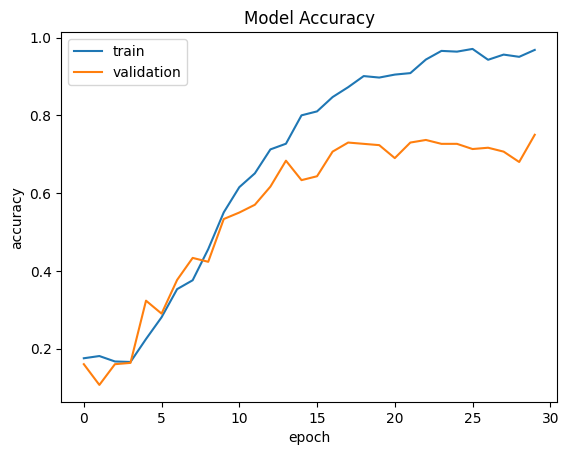

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['classifier_head_accuracy'])
plt.plot(history.history['val_classifier_head_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

#**Classification loss**

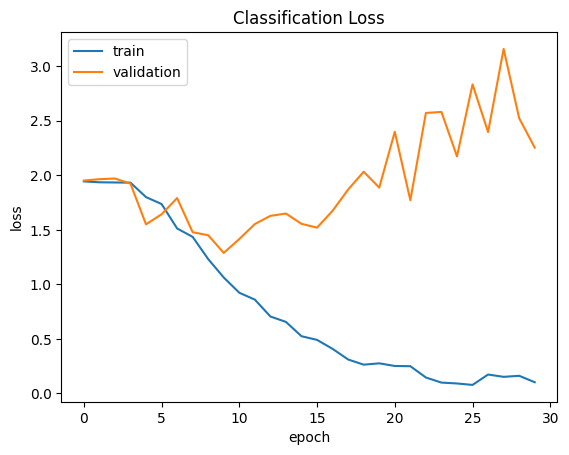

In [ ]:
plt.plot(history.history['classifier_head_loss'])
plt.plot(history.history['val_classifier_head_loss'])
plt.title('Classification Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

#**Bounding box loss**

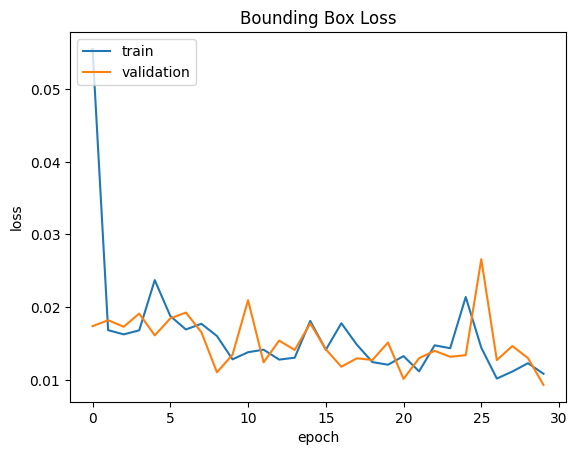

In [ ]:
plt.plot(history.history['regressor_head_loss'])
plt.plot(history.history['val_regressor_head_loss'])
plt.title('Bounding Box Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

#**Model Test**
Hier werde ich das Modell auf Testdaten evaluieren. Das Ergebnis speichere ich in `predictions_class` für Klassifikationsvorhersagen und `predictions_bbox` für Bounding-Box-Vorhersagen.

In [ ]:
predictions_class, predictions_bbox = model.predict(X_test)

5/5 [==============================] - 0s 93ms/step


In [ ]:
predictions_bbox[0]

array([0.3818581 , 0.42572904, 0.42551506, 0.20124729], dtype=float32)

#**Auswertung des Models**

### **Prediction classes**

"Da `predictions_class` im kategorischen Format vorliegt, wende ich `np.argmax(predictions_class, axis=1)` an, um die vorhergesagten Klassenindizes in ein Standardformat umzuwandeln, das aus einer Liste von Klassenlabels besteht, beispielsweise `[1, 2, 0, 2, 3, ...]`

In [ ]:
y_pred_class = np.argmax(predictions_class, axis = 1)
print(y_pred_class.shape)
y_pred_class[:10]


(150,)


array([0, 0, 6, 6, 0, 6, 2, 3, 3, 0])

###**True classes**

In [ ]:
y_true_classes =y_test[:,0]
y_true_classes = [int(i) for i in y_true_classes]
y_true_classes = np.array(y_true_classes)
print(y_true_classes.shape)
y_true_classes[:10]

(150,)


array([0, 0, 0, 0, 0, 0, 2, 3, 3, 1])

#**Classification Accuracy**

Nun kann ich die Klassifikationsgenauigkeit mit Hilfe von scikit-learn berechnen

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true_classes, y_pred_class)
print(f"Classification Accuracy: {accuracy*100}%")


Classification Accuracy: 76.0%


#**Bounding Box mAP**
Ich berechne auch die bounding box mAP wie folgt:

In [ ]:
import numpy as np
from shapely.geometry import box

def yolo_to_voc(bbox, img):
    x_center, y_center, width_bbox, height_bbox = bbox
    img_width, img_height = img.shape[1], img.shape[0]
    x_min = int((x_center - width_bbox / 2) * img_width)
    y_min = int((y_center - height_bbox / 2) * img_height)
    x_max = int((x_center + width_bbox / 2) * img_width)
    y_max = int((y_center + height_bbox / 2) * img_height)
    return x_min, y_min, x_max, y_max

#Pascal VOC box(xmin, ymin, xmax, ymax):
def calculate_iou(box1, box2):
    poly1 = box(box1[0], box1[1], box1[2], box1[3])
    poly2 = box(box2[0], box2[1], box2[2], box2[3])

    intersection = poly1.intersection(poly2).area
    union = poly1.union(poly2).area

    iou = intersection / union if union > 0 else 0.0
    return iou


In [ ]:
import numpy as np


def calculate_ap_for_class(y_true_boxes, y_pred_boxes, y_true_class, class_index, iou_threshold=0.5):
    true_boxes_class = [box for box, label in zip(y_true_boxes, y_true_class) if label == class_index]
    pred_boxes_class = [box for box, label in zip(y_pred_boxes, y_true_class) if label == class_index]

    num_true_boxes = len(true_boxes_class)
    num_pred_boxes = len(pred_boxes_class)

    if num_true_boxes == 0 or num_pred_boxes == 0:
        return 0

    true_positives = np.zeros(num_pred_boxes)
    false_positives = np.zeros(num_pred_boxes)
    for i, pred_box in enumerate(pred_boxes_class):
        iou = calculate_iou(true_boxes_class[i], pred_box)
        if iou >= iou_threshold:
            true_positives[i] = 1
        else:
            false_positives[i] = 1

    cumulative_true_positives = np.cumsum(true_positives)
    cumulative_false_positives = np.cumsum(false_positives)

    precision = cumulative_true_positives / (cumulative_true_positives + cumulative_false_positives)
    recall = cumulative_true_positives / num_true_boxes

    # AP berechnen
    ap = np.sum(precision * np.diff(recall, prepend=0))

    return ap

def calculate_map(y_true_boxes, y_pred_boxes, y_true_class, num_classes=7, iou_threshold=0.5):
    # Berechne mAP für alle Klassen
    ap_per_class = []

    for class_index in range(num_classes):
        ap = calculate_ap_for_class(y_true_boxes, y_pred_boxes, y_true_class, class_index, iou_threshold)
        ap_per_class.append(ap)

    map_score = np.mean(ap_per_class)
    return map_score



#**Bounding Box mAP berechnen**

In [ ]:

y_true_boxes = np.array(y_test[:,1:])  # true bbox
y_pred_boxes = predictions_bbox   #prediction bbox
y_true_boxes = [yolo2voc(x,200,200) for x in y_true_boxes]
y_pred_boxes = [yolo2voc(x,200,200) for x in y_pred_boxes]

y_pred_boxes = np.array(y_pred_boxes)
y_true_boxes = np.array(y_true_boxes)

y_true_classes =y_test[:,0]

map_score = calculate_map(y_true_boxes, y_pred_boxes, y_true_classes,7)
print(f'mAP@50: {map_score*100}%')


mAP@50: 20.550361908388396%


In [ ]:
y_true_boxes = np.array(y_test[:,1:])  # true bbox
y_pred_boxes = predictions_bbox   #prediction bbox
print("y_true_boxes[0] = ", y_true_boxes[0])
print("y_pred_boxes[0] = ", y_pred_boxes[0])
print("y_true_class[0] = ", y_true_classes[0])

y_true_boxes[0] =  [0.35525 0.4703  0.4083  0.1917 ]
y_pred_boxes[0] =  [0.3818581  0.42572904 0.42551506 0.20124729]
y_true_class[0] =  0.0


#**Bounding Box Precision Recall Curve**

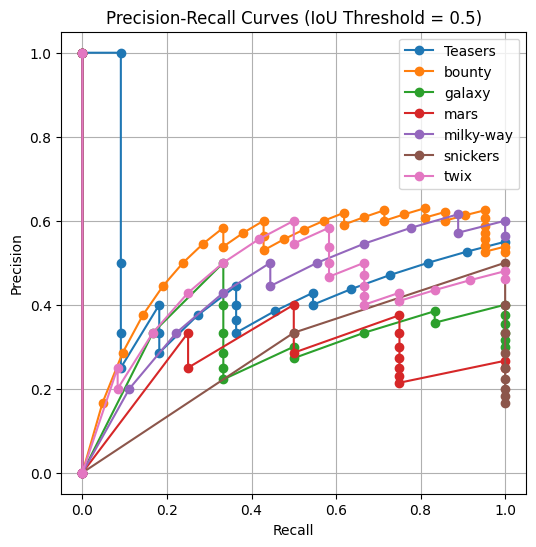

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def plot_precision_recall_curves(y_true_boxes, y_pred_boxes, y_true_classes, iou_threshold=0.5):
    plt.figure(figsize=(6, 6))
    for class_index in range(len(class_names)):
        class_indices = [idx for idx, cls in enumerate(y_true_classes) if cls == class_index]
        y_true_boxes_class = y_true_boxes[class_indices]
        y_pred_boxes_class = y_pred_boxes[class_indices]

        ious = [calculate_iou(yolo2voc(y_true_box, 200, 200), yolo2voc(y_pred_box, 200, 200)) for y_true_box, y_pred_box in zip(y_true_boxes_class, y_pred_boxes_class)]

        labels = [1 if iou >= iou_threshold else 0 for iou in ious]
        class_regression_pred = y_pred_boxes[class_indices]
        class_scores = class_regression_pred[:, 2] * class_regression_pred[:, 3]  # width * height
        precision, recall, _ = precision_recall_curve(labels, class_scores)
        plt.plot(recall, precision, marker='o', label=class_names[class_index])

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curves (IoU Threshold = {iou_threshold})')
    plt.grid(True)
    plt.legend()
    plt.show()
plot_precision_recall_curves(y_true_boxes, y_pred_boxes, y_true_classes)


#**Confusion Matrix**

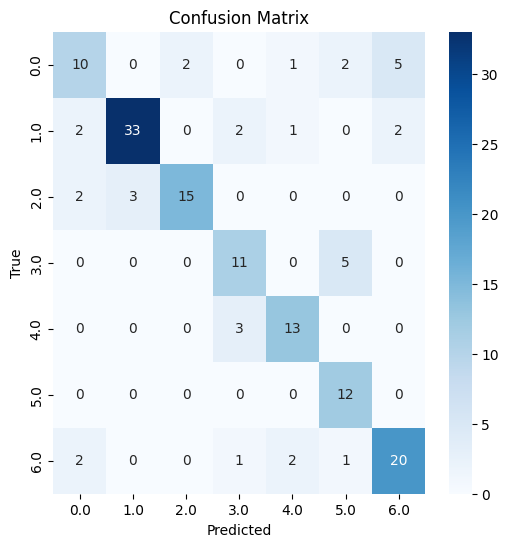

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_true_classes, y_pred_class)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_true_classes),
            yticklabels=np.unique(y_true_classes))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#**Plotten der Bounding Boxes der Testergebnisse**


In [ ]:
import cv2
import numpy as np

def visualize_bboxes(img, bbox_true, bbox_pred, color_true=(0, 255, 0), color_pred=(255, 0, 0), thickness=2):
    x_min_true, y_min_true, x_max_true, y_max_true = yolo_to_voc(bbox_true,img)
    x_min_pred, y_min_pred, x_max_pred,y_max_pred= yolo_to_voc(bbox_pred,img)
    cv2.rectangle(img, (x_min_pred, y_min_pred), (x_max_pred, y_max_pred), color=color_pred, thickness=thickness)
    cv2.rectangle(img, (x_min_true, y_min_true), (x_max_true, y_max_true), color=color_true, thickness=thickness)
    return img

def show_image_with_box(image, bbox_true, bbox_pred,pred_class_name):
  image = visualize_bboxes(image.copy(), bbox_true, bbox_pred)
  pred_box_n = yolo2voc(bbox_pred, image.shape[1],image.shape[1])
  true_box_n = yolo2voc(bbox_true, image.shape[1],image.shape[1])
  IoU = calculate_iou(pred_box_n, true_box_n)
  f = plt.figure(figsize=(3, 3))
  plt.imshow(
    cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    interpolation='nearest'
  )
  plt.axis('off')
  plt.title(f"IoU: {IoU:.4f}\nMarke: {pred_class_name}", fontsize=10, color='yellow', backgroundcolor='black')
  plt.tight_layout(rect=[0, 0, 1, 0.95])

  plt.show()

In [ ]:
import random

def plot_result(num_image):

    for i in range(num_image):
        max_index = len(X_test) - 1
        k = random.randint(0, max_index)
        image = np.array(X_test[k]*255.0)
        y_pred_box = predictions_bbox[k]
        y_pred_index= y_pred_class[k]
        pred_class_name = class_names[y_pred_index]

        image = np.uint8(image)
        #image = cv2.resize(image, (200, 200))
        true_box = y_test[k][1:]

        pred_box = np.array(y_pred_box)
        true_box = np.array(true_box)
        show_image_with_box(image, true_box, pred_box,pred_class_name)  # true = green, pred = blue


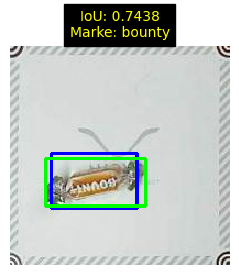

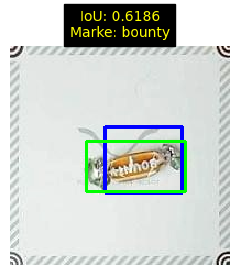

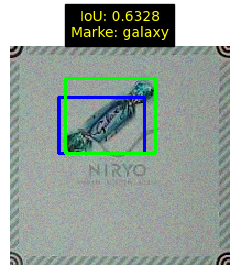

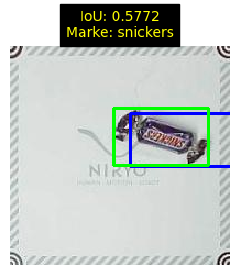

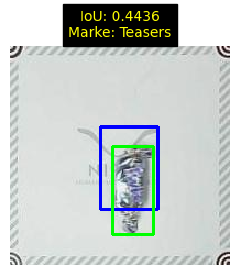

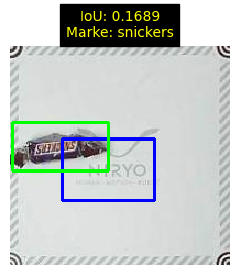

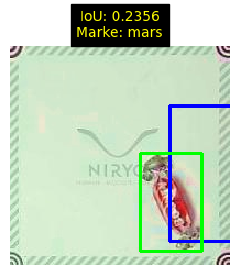

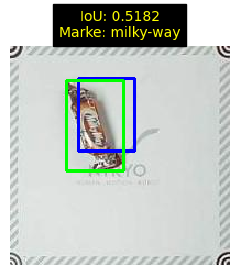

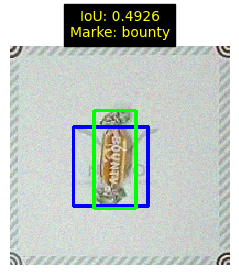

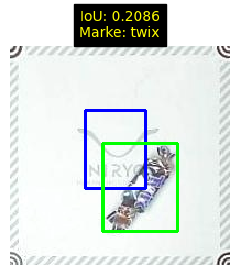

In [ ]:
plot_result(10)

#**Schlussfolgerung**


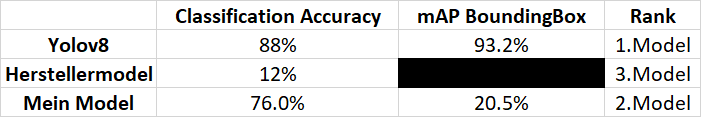

 Die oben genannten Ergebnisse sind überraschend gut.


1. **Klassifikationsgenauigkeit:**
   - YOLOv8: 88
   - Mein Modell:  76
   - Herstellermodell: 12

   Sowohl YOLOv8 als auch mein Modell haben eine vergleichbare Klassifikationsgenauigkeit, die höher ist als die des Herstellermodells.

2. **Bounding Box mAP:**
   - YOLOv8: 93.2
   - Mein Modell: 20.5
   - Herstellermodell: -

   YOLOv8 hat eine deutlich höhere Bounding Box mAP im Vergleich zu meinem Modell. Da das Herstellermodell keine Bounding Box mAP bereitstellt, ist ein direkter Vergleich in diesem Aspekt nicht möglich.

 YOLOv8 scheint insgesamt die beste Leistung zu haben, sowohl in der Klassifikation als auch bei der Erkennung von Bounding Box. Mein Modell hat eine ähnliche Klassifikationsgenauigkeit, aber eine niedrigere Bounding Box mAP im Vergleich zu YOLOv8. Das Herstellermodell weist niedrigere Werte auf, insbesondere bei der Klassifikation, und verwendet Datenmaskierung, was bedeutet, dass es keine expliziten Bounding Box mAP-Werte bereitstellt.
